# Breast cancer community

In [1]:
import json
import datetime
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import scipy.stats as stats
import csv
import random

In [2]:
# load json file
data = {}
for i in range(546, 0, -1):
    with open('breast/breast_data'+str(i)+'.txt') as json_file:
#for i in range(503, 0, -1):
    #with open('D:/breast/colore_data'+str(i)+'.txt') as json_file:              
        dat = json.load(json_file)
        data.update(dat)

In [3]:
# check
"""data is a dictionary; each key is a post webpage"""
print "The number of threads is " +str(len(data))
print data['/node/137891']['post_time']
print data['/node/137891']['user']
print data['/node/137891']['reply'][0]['post_time']
print data['/node/137891']['reply'][0]['user']
print data['/node/137891']['reply'][0]['text']

The number of threads is 27221
Jun 04, 2002 
bullfrog13
Jun 05, 2002 
marytres
Hi, Jerilyn, my periods stopped when I was on the chemo too and the oncologist told me to tell him if my periods came back after I finished the chemo. Well, they did and he told me to come in so he could give me a shot to make sure my periods don't come back. I'm sorry to say that I don't remember the name of the shot but I've been having it every 3 months for almost 2 years now. The doctor said I shouldn't have my periods anymore. I'm 44 years old now. Don't know if I've been of any help but I would ask another oncologist if I were you. Take care, Marie</p>\n</div>, 


# Construct graphs (every 3 months)

In [4]:
"""""
# construct a directed graph
def extract_digraph_3m(m, y):  # two parameters: m = month, y = year
    g = nx.DiGraph()
    for key in data:
        i = 0      
        while i < 80:            
            try:
                if data[key]['user'] != data[key]['reply'][i]['user'] and data[key]['reply'][i]['post_time'].split()[0] in m and data[key]['reply'][i]['post_time'].split(', ')[1] == y+' ':
                    g.add_edge(data[key]['user'], data[key]['reply'][i]['user'])
                elif data[key]['user'] == data[key]['reply'][i]['user'] and data[key]['reply'][i]['post_time'].split()[0] in m and data[key]['reply'][i]['post_time'].split(', ')[1] == y+' ':
                    continue
            except:
                if data[key]['post_time'].split()[0] in m and data[key]['post_time'].split(', ')[1] == y+' ': # no one replies the poster
                    g.add_node(data[key]['user'])
            i += 1
    return g

m1 = set(['Jan', 'Feb', 'Mar'])
m4 = set(['Apr', 'May', 'Jun'])
m7 = set(['Jul', 'Aug', 'Sep'])
m10 = set(['Oct', 'Nov', 'Dec'])

graphs1 = []
for i in range(2000, 2017):
    g = extract_digraph_3m(m1, str(i))    
    graphs1.append(g)

graphs2 = []
for i in range(2000, 2017):
    g = extract_digraph_3m(m4, str(i))    
    graphs2.append(g)  

graphs3 = []
for i in range(2000, 2017):
    g = extract_digraph_3m(m7, str(i))    
    graphs3.append(g)

graphs4 = []
for i in range(2000, 2017):
    g = extract_digraph_3m(m10, str(i))    
    graphs4.append(g)     
    
graphs = []
for i in range(17):  #remember of change this range
    graphs.append(graphs1[i])
    graphs.append(graphs2[i])
    graphs.append(graphs3[i])
    graphs.append(graphs4[i])    
len(graphs)

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-4-c73d4e51ee49>, line 50)

# Construct a single graph

In [5]:
G = nx.DiGraph()
for key in data:                               
    if data[key]['reply'] == []: # no one replies the poster
        G.add_node(data[key]['user'])
        continue   # go back to the for loop to find the next webpage
    else:
        i = 0 
        while i < 50: 
            try:  # handle exception: When i is out of range, break
                if data[key]['user'] != data[key]['reply'][i]['user']:
                    G.add_edge(data[key]['user'], data[key]['reply'][i]['user']) # from poster to replier
                else:
                    pass
            except:
                break
            i += 1

In [6]:
print nx.info(G)

Name: 
Type: DiGraph
Number of nodes: 8493
Number of edges: 100196
Average in degree:  11.7975
Average out degree:  11.7975


In [9]:
for node in G:
    all_neighbors(G, node)

NameError: name 'all_neighbors' is not defined

In [19]:
# construct a directed graph
def extract_digraph_3m(m, y):  # two parameters: m = month, y = year
    g = nx.DiGraph()
    for key in data:                               
        if data[key]['post_time'].split()[0] in m and data[key]['post_time'].split(', ')[1] == y+' ' and data[key]['reply'] == []: # no one replies the poster
            g.add_node(data[key]['user'])
            continue   # go back to the for loop to find the next webpage
        else:
            i = 0 
            while i < 50: 
                try:  # handle exception: When i is out of range, break
                    if data[key]['reply'][i]['post_time'].split()[0] in m and data[key]['reply'][i]['post_time'].split(', ')[1] == y+' ':  #exclude self-loop
                        if data[key]['user'] != data[key]['reply'][i]['user']:
                            g.add_edge(data[key]['user'], data[key]['reply'][i]['user']) # from poster to replier
                        else:
                            pass
                except:
                    break
                i += 1
    return g

m1 = set(['Jan', 'Feb', 'Mar'])
m4 = set(['Apr', 'May', 'Jun'])
m7 = set(['Jul', 'Aug', 'Sep'])
m10 = set(['Oct', 'Nov', 'Dec'])

graphs1 = []
for i in range(2000, 2017):
    g = extract_digraph_3m(m1, str(i))    
    graphs1.append(g)

graphs2 = []
for i in range(2000, 2017):
    g = extract_digraph_3m(m4, str(i))    
    graphs2.append(g)  

graphs3 = []
for i in range(2000, 2017):
    g = extract_digraph_3m(m7, str(i))    
    graphs3.append(g)

graphs4 = []
for i in range(2000, 2017):
    g = extract_digraph_3m(m10, str(i))    
    graphs4.append(g)     
    
graphs = []
for i in range(17):  #remember of change this range
    graphs.append(graphs1[i])
    graphs.append(graphs2[i])
    graphs.append(graphs3[i])
    graphs.append(graphs4[i])    
len(graphs)

68

# Construct graphs by month

In [36]:
# construct a directed graph
def extract_digraph_m(m, y):  # two parameters: m = month, y = year
    g = nx.DiGraph()
    for key in data:                               
        if data[key]['post_time'].split()[0] in m and data[key]['post_time'].split(', ')[1] == y+' ' and data[key]['reply'] == []: # no one replies the poster
            g.add_node(data[key]['user'])
            continue   # go back to the for loop to find the next webpage
        else:
            i = 0 
            while i < 50: 
                try:  # handle exception: When i is out of range, break
                    if data[key]['reply'][i]['post_time'].split()[0] in m and data[key]['reply'][i]['post_time'].split(', ')[1] == y+' ':  #exclude self-loop
                        if data[key]['user'] != data[key]['reply'][i]['user']:
                            g.add_edge(data[key]['user'], data[key]['reply'][i]['user']) # from poster to replier
                        else:
                            pass
                except:
                    break
                i += 1
    return g

graphs = []
for i in range(2000, 2017):
    for m in ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']:
        g = extract_digraph_m(m, str(i))    
        graphs.append(g)   
len(graphs)

204

# Construct graphs every 2 months

In [3]:
# construct a directed graph
def extract_digraph_2m(m, y):  # two parameters: m = month, y = year
    g = nx.DiGraph()
    for key in data:                               
        if data[key]['post_time'].split()[0] in m and data[key]['post_time'].split(', ')[1] == y+' ' and data[key]['reply'] == []: # no one replies the poster
            g.add_node(data[key]['user'])
            continue   # go back to the for loop to find the next webpage
        else:
            i = 0 
            while i < 50: 
                try:  # handle exception: When i is out of range, break
                    if data[key]['reply'][i]['post_time'].split()[0] in m and data[key]['reply'][i]['post_time'].split(', ')[1] == y+' ':  #exclude self-loop
                        if data[key]['user'] != data[key]['reply'][i]['user']:
                            g.add_edge(data[key]['user'], data[key]['reply'][i]['user']) # from poster to replier
                        else:
                            pass
                except:
                    break
                i += 1
    return g

m1 = set(['Jan', 'Feb'])
m3 = set(['Mar', 'Apr'])
m5 = set(['May', 'Jun'])
m7 = set(['Jul', 'Aug'])
m9 = set(['Sep', 'Oct'])
m11 = set(['Nov', 'Dec'])

graphs1 = []
for i in range(2000, 2017):
    g = extract_digraph_2m(m1, str(i))    
    graphs1.append(g)

graphs2 = []
for i in range(2000, 2017):
    g = extract_digraph_2m(m3, str(i))    
    graphs2.append(g)  

graphs3 = []
for i in range(2000, 2017):
    g = extract_digraph_2m(m5, str(i))    
    graphs3.append(g)

graphs4 = []
for i in range(2000, 2017):
    g = extract_digraph_2m(m7, str(i))    
    graphs4.append(g)     

graphs5 = []
for i in range(2000, 2017):
    g = extract_digraph_2m(m9, str(i))    
    graphs5.append(g) 
    
graphs6 = []
for i in range(2000, 2017):
    g = extract_digraph_2m(m11, str(i))    
    graphs6.append(g) 
    
graphs = []
for i in range(17):  #remember of change this range
    graphs.append(graphs1[i])
    graphs.append(graphs2[i])
    graphs.append(graphs3[i])
    graphs.append(graphs4[i])
    graphs.append(graphs5[i])
    graphs.append(graphs6[i])    
len(graphs)

102

In [4]:
for g in graphs:
    print nx.info(g)

Name: 
Type: DiGraph
Number of nodes: 0
Number of edges: 0

Name: 
Type: DiGraph
Number of nodes: 0
Number of edges: 0

Name: 
Type: DiGraph
Number of nodes: 0
Number of edges: 0

Name: 
Type: DiGraph
Number of nodes: 17
Number of edges: 21
Average in degree:   1.2353
Average out degree:   1.2353
Name: 
Type: DiGraph
Number of nodes: 41
Number of edges: 100
Average in degree:   2.4390
Average out degree:   2.4390
Name: 
Type: DiGraph
Number of nodes: 64
Number of edges: 204
Average in degree:   3.1875
Average out degree:   3.1875
Name: 
Type: DiGraph
Number of nodes: 74
Number of edges: 343
Average in degree:   4.6351
Average out degree:   4.6351
Name: 
Type: DiGraph
Number of nodes: 121
Number of edges: 509
Average in degree:   4.2066
Average out degree:   4.2066
Name: 
Type: DiGraph
Number of nodes: 114
Number of edges: 546
Average in degree:   4.7895
Average out degree:   4.7895
Name: 
Type: DiGraph
Number of nodes: 145
Number of edges: 545
Average in degree:   3.7586
Average out de

In [5]:
# deal with Anonymous user
dg = []
for g in graphs:
    for node in g:
        if node == 'Anonymous user (not verified)':
            dg.append(g.degree(node))
print dg
# it is very likely that the anonymous users are different people. So if we remove them, it should not affect the whole network.
for g in graphs:
    try:
        g.remove_node('Anonymous user (not verified)')
    except:
        pass
dg = []
for g in graphs:
    for node in g:
        if node == 'Anonymous user (not verified)':
            dg.append(g.degree(node))
print dg

[2, 14, 23, 31, 44, 23, 23, 11, 18, 6, 8, 23, 4, 6, 2, 1, 3, 3, 6, 1, 2, 5, 3, 1, 1, 2, 2, 1, 3, 29, 54, 51, 31, 4, 5, 10, 8, 7, 41, 7, 4, 19, 4, 1, 3, 1]
[]


# Save graphs

In [11]:
nx.write_gml(graphs[70], 'g70.gml')

# Network embeddedness and retention rate

Retention rate

% of people who ever posted at time T and continued to post at time T+1 

In [6]:
# find unique users for each graph and store the results to a list
users = []
#for g in graphs[2:]:  # for breast cancer 3-month-span, start from the third graph b/c the first two graphs are empty.
for g in graphs[3:]:  # for breast cancer 2-month-span, start from the fourth graph b/c the first three graphs are empty.  
#for g in graphs[7:]:  # for breast cancer 1-month span, start from the 8th graph
#for g in graphs[4:]:  #start from the third graph b/c the first two graphs are empty.
#for g in graphs[13:]:  #start from the third graph b/c the first two graphs are empty.
    s = set()
    for node in g:
        s.add(node)
    users.append(s)
print "The total number of graphs is "+str(len(users))

retention = []
for i in range(len(users)-1):
    r = len(users[i]&users[i+1])/float(len(users[i]))
    retention.append(r)
print "The total number of rentation rates is " + str(len(retention))
print retention

The total number of graphs is 99
The total number of rentation rates is 98
[0.4375, 0.375, 0.47619047619047616, 0.5068493150684932, 0.35833333333333334, 0.5398230088495575, 0.3125, 0.5303030303030303, 0.5606060606060606, 0.5428571428571428, 0.3602150537634409, 0.5208333333333334, 0.5447154471544715, 0.46511627906976744, 0.328125, 0.379746835443038, 0.2631578947368421, 0.3688888888888889, 0.40331491712707185, 0.4195804195804196, 0.5259259259259259, 0.36328125, 0.29508196721311475, 0.4438202247191011, 0.42391304347826086, 0.3431952662721893, 0.48854961832061067, 0.45625, 0.3620689655172414, 0.40625, 0.30246913580246915, 0.45081967213114754, 0.3543307086614173, 0.43137254901960786, 0.3783783783783784, 0.3711340206185567, 0.40229885057471265, 0.35051546391752575, 0.38461538461538464, 0.40963855421686746, 0.43373493975903615, 0.40476190476190477, 0.4606741573033708, 0.4148936170212766, 0.45714285714285713, 0.3695652173913043, 0.42696629213483145, 0.42105263157894735, 0.40397350993377484, 0.

In [7]:
def reciprocity(G, nodes=None):
    if nodes is None:
        return overall_reciprocity(G)

    # If `nodes` represents a single node in the graph, return only its
    # reciprocity.
    if nodes in G:
        reciprocity = next(_reciprocity_iter(G,nodes))[1]
        if reciprocity is None:
            raise NetworkXError('Not defined for isolated nodes.')
        else:
            return reciprocity

    # Otherwise, `nodes` represents an iterable of nodes, so return a
    # dictionary mapping node to its reciprocity.
    return dict(_reciprocity_iter(G,nodes))


def _reciprocity_iter(G,nodes):
    n = G.nbunch_iter(nodes)
    for node in n:
        pred = set(G.predecessors(node))
        succ = set(G.successors(node))
        overlap = pred & succ
        n_total = len(pred) + len(succ)

        # Reciprocity is not defined for isolated nodes.
        # Return None.
        if n_total == 0:
            yield (node,None)
        else:
            reciprocity = 2.0*float(len(overlap))/float(n_total)
            yield (node,reciprocity)
        
def overall_reciprocity(G):
    n_all_edge = G.number_of_edges()
    n_overlap_edge = (n_all_edge - G.to_undirected().number_of_edges()) *2

    if n_all_edge == 0:
        raise NetworkXError("Not defined for empty graphs")

    return float(n_overlap_edge)/float(n_all_edge)

In [16]:
#predictors and possible confounders
edge_size = []
node_size = []
density = []
trans = []
recp = []
degree = []
#shortest = []
diameter = []
#cc = []
#for g in graphs[2:]:  # start from the 3rd graph
for g in graphs[3:]:  # start from the 4th graph
#for g in graphs[7:]:
#for g in graphs[4:]:   
#for g in graphs[13:]:   #start from 2002/03
    e = g.size()
    n = nx.number_of_nodes(g)
    d = nx.density(g)
    t = nx.transitivity(g)
    r = reciprocity(g)
    #short = nx.average_shortest_path_length(max(nx.strongly_connected_component_subgraphs(g), key=len))
    dia = nx.diameter(max(nx.strongly_connected_component_subgraphs(g), key=len))
    dg = np.mean(nx.degree(g).values())/2
    #c = nx.average_clustering(g)  #'Clustering algorithms are not defined ', 'for directed graphs.'
    edge_size.append(e)
    node_size.append(n)
    density.append(d)
    trans.append(t)
    recp.append(r)
    #shortest.append(short)
    diameter.append(dia)
    degree.append(dg)
    #cc.append(c)
edge_size = edge_size[:len(retention)]  # exclude the last graph
node_size = node_size[:len(retention)] 
density = density[:len(retention)]
trans = trans[:len(retention)]
recp = recp[:len(retention)]
degree = degree[:len(retention)]
#shortest_path = degree[:len(retention)]
diameter = diameter[:len(retention)]
"""
print edge_size
print node_size
print density
print trans
print recp
print degree
"""

'\nprint edge_size\nprint node_size\nprint density\nprint trans\nprint recp\nprint degree\n'

In [16]:
print density
#print retention
#print recp
print node_size

[0.08571428571428572, 0.06615384615384616, 0.05665024630541872, 0.06217948717948718, 0.06341463414634146, 0.07482993197278912, 0.06059506531204644, 0.03700516351118761, 0.05134575569358178, 0.05672926447574335, 0.04365465757870821, 0.026864728192161822, 0.028600612870275793, 0.06531531531531531, 0.04579124579124579, 0.04152823920265781, 0.04421768707482993, 0.046464646464646465, 0.059666975023126734, 0.03528481012658228, 0.018691181596375044, 0.03172533681008257, 0.04962707974756168, 0.031584158415841584, 0.04828828828828829, 0.03875968992248062, 0.03453947368421053, 0.04196738839882384, 0.03263157894736842, 0.02762268586541287, 0.016134316134316134, 0.01214310285517716, 0.011956521739130435, 0.01788617886178862, 0.024256963881114223, 0.024830426356589146, 0.02375102375102375, 0.028167367928938758, 0.027472527472527472, 0.02850877192982456, 0.030694205393000575, 0.01884498480243161, 0.013625077591558038, 0.009937888198757764, 0.01694430834558223, 0.016664292835778378, 0.017609784851164

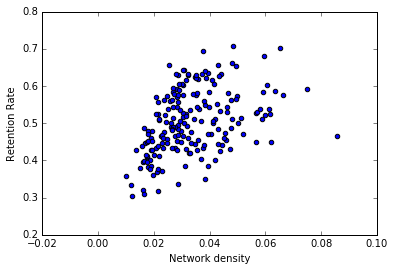

In [17]:
plt.scatter(density, retention)
plt.xlabel('Network density')
plt.ylabel('Retention Rate')

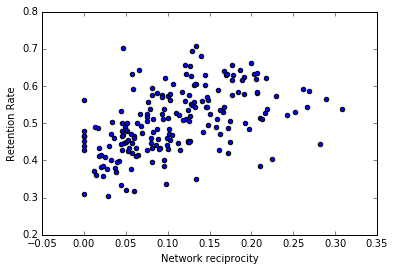

In [18]:
plt.scatter(recp, retention)
plt.xlabel('Network reciprocity')
plt.ylabel('Retention Rate')

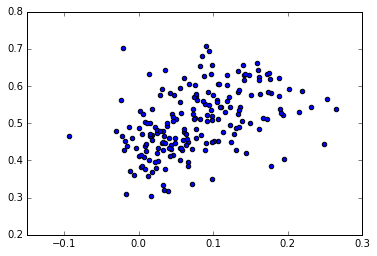

In [31]:
# recp2 = (recp-density)/(1-density)
a = np.subtract(recp, density)
b = np.subtract(1, density)
recp2 = np.divide(a, b)
plt.scatter(recp2, retention)

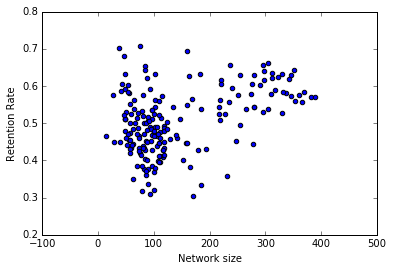

In [19]:
#possible confounders:
plt.scatter(node_size, retention)
plt.xlabel('Network size')
plt.ylabel('Retention Rate')

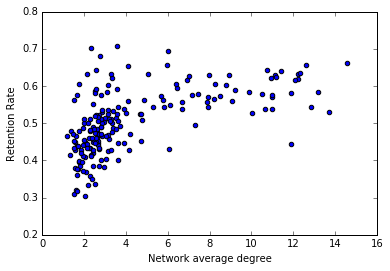

In [20]:
plt.scatter(degree, retention)
plt.xlabel('Network average degree')
plt.ylabel('Retention Rate')

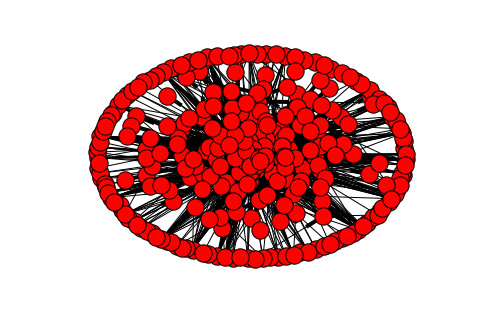

In [21]:
nx.draw(graphs[80])

Construct an undirected graph to get clustering coefficients

In [37]:
# construct an undirected graph
undigraphs = []
for g in graphs:
    g=nx.Graph(g)
    undigraphs.append(g)

In [38]:
# deal with Anonymous user
dg = []
for g in undigraphs:
    for node in g:
        if node == 'Anonymous user (not verified)':
            dg.append(g.degree(node))
print dg
# it is very likely that the anonymous users are different people. So if we remove them, it should not affect the whole network.
for g in undigraphs:
    try:
        g.remove_node('Anonymous user (not verified)')
    except:
        pass
dg = []
for g in undigraphs:
    for node in g:
        if node == 'Anonymous user (not verified)':
            dg.append(g.degree(node))
print dg

[2, 6, 11, 12, 15, 15, 21, 25, 25, 12, 12, 17, 9, 8, 5, 11, 7, 2, 4, 5, 3, 10, 15, 3, 1, 3, 3, 2, 1, 1, 2, 3, 6, 1, 2, 3, 2, 3, 1, 1, 1, 1, 2, 1, 1, 2, 9, 21, 31, 22, 27, 28, 28, 4, 5, 1, 9, 8, 2, 5, 7, 38, 5, 2, 4, 16, 7, 1, 3, 1, 3, 1]
[]


In [39]:
for g in undigraphs:
    print nx.info(g)

Name: 
Type: Graph
Number of nodes: 0
Number of edges: 0

Name: 
Type: Graph
Number of nodes: 0
Number of edges: 0

Name: 
Type: Graph
Number of nodes: 0
Number of edges: 0

Name: 
Type: Graph
Number of nodes: 0
Number of edges: 0

Name: 
Type: Graph
Number of nodes: 0
Number of edges: 0

Name: 
Type: Graph
Number of nodes: 0
Number of edges: 0

Name: 
Type: Graph
Number of nodes: 3
Number of edges: 2
Average degree:   1.3333
Name: 
Type: Graph
Number of nodes: 15
Number of edges: 18
Average degree:   2.4000
Name: 
Type: Graph
Number of nodes: 26
Number of edges: 41
Average degree:   3.1538
Name: 
Type: Graph
Number of nodes: 29
Number of edges: 42
Average degree:   2.8966
Name: 
Type: Graph
Number of nodes: 40
Number of edges: 91
Average degree:   4.5500
Name: 
Type: Graph
Number of nodes: 41
Number of edges: 90
Average degree:   4.3902
Name: 
Type: Graph
Number of nodes: 49
Number of edges: 153
Average degree:   6.2449
Name: 
Type: Graph
Number of nodes: 53
Number of edges: 156
Avera

In [40]:
cc = []
shortest = []
for g in undigraphs[7:]:
#for g in undigraphs[13:]:
    c = nx.average_clustering(g)
    short = nx.average_shortest_path_length(max(nx.connected_component_subgraphs(g), key=len))
    cc.append(c)
    shortest.append(short)
#cc = cc[:len(retention)]   # exclude the last graph
#shortest = shortest[:len(retention)]
#print cc 

In [41]:
len(cc)

197

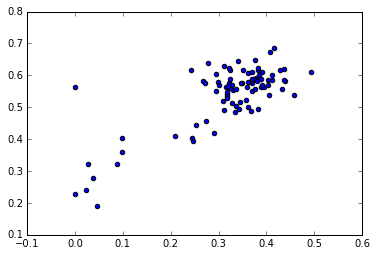

In [57]:
plt.scatter(cc, retention)

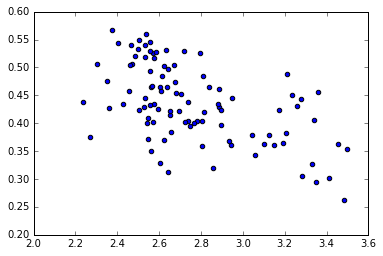

In [17]:
plt.scatter(shortest, retention)

# Look at # of initial posts, replies, and self-replies

In [4]:
# look at the whole 16-year period without time sclicing
allpost = []  # total number of posts + replies
initialpost = []
reply = []
self = []
for key in data:
    month = data[key]['post_time'].split()[0]
    year = data[key]['post_time'].split(', ')[1]
    allpost.append(year+month)
    initialpost.append(year+month)
    
    i = 0
    while i < 50:
        try:
            month = data[key]['reply'][i]['post_time'].split()[0]
            year = data[key]['reply'][i]['post_time'].split(', ')[1]
            allpost.append(year+month)
            
            if data[key]['reply'][i]['user'] == data[key]['user']:
                self.append(year+month)
            elif data[key]['reply'][i]['user'] != data[key]['user']:
                reply.append(year+month)            
        except:
            pass
        i += 1

print len(allpost)
print len(initialpost)
print len(reply)
print len(self)
print len(initialpost) + len(reply) + len(self)

319407
27221
261060
31126
319407


In [27]:
# split into quarter
allpost = []  # total number of posts + replies
initialpost = []
reply = []
self = []
for key in data:
    month = data[key]['post_time'].split()[0]
    year = data[key]['post_time'].split(', ')[1]
    allpost.append(year+month)
    initialpost.append(year+month)
    
    i = 0
    while i < 50:
        try:
            month = data[key]['reply'][i]['post_time'].split()[0]
            year = data[key]['reply'][i]['post_time'].split(', ')[1]
            allpost.append(year+month)
            
            if data[key]['reply'][i]['user'] == data[key]['user']:
                self.append(year+month)
            elif data[key]['reply'][i]['user'] != data[key]['user']:
                reply.append(year+month)            
        except:
            pass
        i += 1

print len(allpost)
print len(initialpost) + len(reply) + len(self)

def split_into_quarter(post_type):
    case = []
    for i in post_type:
        if i.split()[1] in set(['Jan', 'Feb', 'Mar']):
            case.append(i.split()[0]+' '+'q1')
        elif i.split()[1] in set(['Apr', 'May', 'Jun']):
            case.append(i.split()[0]+' '+'q2')
        elif i.split()[1] in set(['Jul', 'Aug', 'Sep']):
            case.append(i.split()[0]+' '+'q3')
        else:
            case.append(i.split()[0]+' '+'q4')        
    return case

allpost = split_into_quarter(allpost)
print "The number of all posts is " +str(len(allpost))
print allpost[:5]

initialpost = split_into_quarter(initialpost)
print "The number of initial posts is " +str(len(initialpost))
print initialpost[:5]

reply = split_into_quarter(reply)
print "The number of replies is " +str(len(reply))
print reply[:5]

self = split_into_quarter(self)
print "The number of self replies is " +str(len(self))
print self[:5]

319407
319407
319407
[u'2002 q3', u'2002 q3', u'2002 q3', u'2002 q3', u'2002 q3']
27221
[u'2002 q3', u'2002 q3', u'2002 q3', u'2002 q3', u'2002 q3']
261060
[u'2002 q3', u'2002 q3', u'2002 q3', u'2002 q3', u'2002 q3']
31126
[u'2002 q3', u'2002 q3', u'2002 q3', u'2002 q3', u'2004 q2']


In [10]:
# split into every 2 months
allpost = []  # total number of posts + replies
initialpost = []
reply = []
self = []
for key in data:
    month = data[key]['post_time'].split()[0]
    year = data[key]['post_time'].split(', ')[1]
    allpost.append(year+month)
    initialpost.append(year+month)
    
    i = 0
    while i < 50:
        try:
            month = data[key]['reply'][i]['post_time'].split()[0]
            year = data[key]['reply'][i]['post_time'].split(', ')[1]
            allpost.append(year+month)
            
            if data[key]['reply'][i]['user'] == data[key]['user']:
                self.append(year+month)
            elif data[key]['reply'][i]['user'] != data[key]['user']:
                reply.append(year+month)            
        except:
            pass
        i += 1

print len(allpost)
print len(initialpost) + len(reply) + len(self)

def split_into_quarter(post_type):
    case = []
    for i in post_type:
        if i.split()[1] in set(['Jan', 'Feb']):
            case.append(i.split()[0]+' '+'q1')
        elif i.split()[1] in set(['Mar', 'Apr']):
            case.append(i.split()[0]+' '+'q2')
        elif i.split()[1] in set(['May', 'Jun']):
            case.append(i.split()[0]+' '+'q3')
        elif i.split()[1] in set(['Jul', 'Aug']):
            case.append(i.split()[0]+' '+'q4')
        elif i.split()[1] in set(['Sep', 'Oct']):
            case.append(i.split()[0]+' '+'q5')
        else:
            case.append(i.split()[0]+' '+'q6')        
    return case

allpost = split_into_quarter(allpost)
print "The number of all posts is " +str(len(allpost))
print allpost[:5]

initialpost = split_into_quarter(initialpost)
print "The number of initial posts is " +str(len(initialpost))
print initialpost[:5]

reply = split_into_quarter(reply)
print "The number of replies is " +str(len(reply))
print reply[:5]

self = split_into_quarter(self)
print "The number of self replies is " +str(len(self))
print self[:5]

319407
319407
The number of all posts is 319407
[u'2002 q4', u'2002 q4', u'2002 q4', u'2002 q4', u'2002 q4']
The number of initial posts is 27221
[u'2002 q4', u'2002 q4', u'2002 q4', u'2002 q4', u'2002 q4']
The number of replies is 261060
[u'2002 q4', u'2002 q4', u'2002 q4', u'2002 q4', u'2002 q4']
The number of self replies is 31126
[u'2002 q4', u'2002 q4', u'2002 q4', u'2002 q4', u'2004 q2']


In [21]:
# split every month
allpost = []  # total number of posts + replies
initialpost = []
reply = []
self = []
for key in data:
    month = data[key]['post_time'].split()[0]
    year = data[key]['post_time'].split(', ')[1]
    allpost.append(year+month)
    initialpost.append(year+month)
    
    i = 0
    while i < 50:
        try:
            month = data[key]['reply'][i]['post_time'].split()[0]
            year = data[key]['reply'][i]['post_time'].split(', ')[1]
            allpost.append(year+month)
            
            if data[key]['reply'][i]['user'] == data[key]['user']:
                self.append(year+month)
            elif data[key]['reply'][i]['user'] != data[key]['user']:
                reply.append(year+month)            
        except:
            pass
        i += 1

print len(allpost)
print len(initialpost) + len(reply) + len(self)

def split_into_quarter(post_type):
    case = []
    for i in post_type:
        if i.split()[1] in set(['Jan']):
            case.append(i.split()[0]+' '+'q1')
        elif i.split()[1] in set(['Feb']):
            case.append(i.split()[0]+' '+'q2')
        elif i.split()[1] in set(['Mar']):
            case.append(i.split()[0]+' '+'q3')
        elif i.split()[1] in set(['Apr']):
            case.append(i.split()[0]+' '+'q4')
        elif i.split()[1] in set(['May']):
            case.append(i.split()[0]+' '+'q5')
        elif i.split()[1] in set(['Jun']):
            case.append(i.split()[0]+' '+'q6')
        elif i.split()[1] in set(['Jul']):
            case.append(i.split()[0]+' '+'q7')
        elif i.split()[1] in set(['Aug']):
            case.append(i.split()[0]+' '+'q8')
        elif i.split()[1] in set(['Sep']):
            case.append(i.split()[0]+' '+'q9')
        elif i.split()[1] in set(['Oct']):
            case.append(i.split()[0]+' '+'q10')
        elif i.split()[1] in set(['Nov']):
            case.append(i.split()[0]+' '+'q11')
        else:
            case.append(i.split()[0]+' '+'q12')        
    return case

allpost = split_into_quarter(allpost)
print "The number of all posts is " +str(len(allpost))
print allpost[:5]

initialpost = split_into_quarter(initialpost)
print "The number of initial posts is " +str(len(initialpost))
print initialpost[:5]

reply = split_into_quarter(reply)
print "The number of replies is " +str(len(reply))
print reply[:5]

self = split_into_quarter(self)
print "The number of self replies is " +str(len(self))
print self[:5]

319407
319407
The number of all posts is 319407
[u'2002 q8', u'2002 q8', u'2002 q8', u'2002 q8', u'2002 q8']
The number of initial posts is 27221
[u'2002 q8', u'2002 q8', u'2002 q8', u'2002 q8', u'2002 q8']
The number of replies is 261060
[u'2002 q8', u'2002 q8', u'2002 q8', u'2002 q8', u'2002 q8']
The number of self replies is 31126
[u'2002 q8', u'2002 q8', u'2002 q8', u'2002 q8', u'2004 q4']


In [22]:
"""""
allpost = split_into_quarter(allpost)
    
quarterall = []
quarterreply = []
quarterself = []
for time in post_time:
    if time.split()[1] in set(['Jan', 'Feb', 'Mar']):
        quarterall.append(time.split()[0]+' '+'q1')
    elif time.split()[1] in set(['Apr', 'May', 'Jun']):
        quarterall.append(time.split()[0]+' '+'q2')
    elif time.split()[1] in set(['Jul', 'Aug', 'Sep']):
        quarterall.append(time.split()[0]+' '+'q3')
    else:
        quarterall.append(time.split()[0]+' '+'q4')

print len(quarterall)
print quarterall[:10]

#look at only initial posts
quarter0 = []
for time in initialpost:
    if time.split()[1] in set(['Jan', 'Feb', 'Mar']):
        quarter0.append(time.split()[0]+' '+'q1')
    elif time.split()[1] in set(['Apr', 'May', 'Jun']):
        quarter0.append(time.split()[0]+' '+'q2')
    elif time.split()[1] in set(['Jul', 'Aug', 'Sep']):
        quarter0.append(time.split()[0]+' '+'q3')
    else:
        quarter0.append(time.split()[0]+' '+'q4')

print len(quarter0)
print quarter0[:10]

NameError: name 'post_time' is not defined

In [11]:
print sorted(Counter(allpost).items())
print len(Counter(allpost))
print sorted(Counter(self).items())
print len(Counter(self))
print sorted(Counter(initialpost).items())
print len(Counter(initialpost))

[(u'2000 q4', 42), (u'2000 q5', 213), (u'2000 q6', 515), (u'2001 q1', 791), (u'2001 q2', 1170), (u'2001 q3', 1027), (u'2001 q4', 1004), (u'2001 q5', 413), (u'2001 q6', 318), (u'2002 q1', 473), (u'2002 q2', 1069), (u'2002 q3', 1440), (u'2002 q4', 1108), (u'2002 q5', 1027), (u'2002 q6', 966), (u'2003 q1', 745), (u'2003 q2', 1111), (u'2003 q3', 1285), (u'2003 q4', 1082), (u'2003 q5', 836), (u'2003 q6', 751), (u'2004 q1', 1270), (u'2004 q2', 1439), (u'2004 q3', 699), (u'2004 q4', 820), (u'2004 q5', 819), (u'2004 q6', 424), (u'2005 q1', 572), (u'2005 q2', 596), (u'2005 q3', 394), (u'2005 q4', 481), (u'2005 q5', 387), (u'2005 q6', 396), (u'2006 q1', 330), (u'2006 q2', 557), (u'2006 q3', 520), (u'2006 q4', 519), (u'2006 q5', 535), (u'2006 q6', 465), (u'2007 q1', 471), (u'2007 q2', 410), (u'2007 q3', 325), (u'2007 q4', 383), (u'2007 q5', 532), (u'2007 q6', 425), (u'2008 q1', 821), (u'2008 q2', 959), (u'2008 q3', 969), (u'2008 q4', 1286), (u'2008 q5', 1741), (u'2008 q6', 1981), (u'2009 q1', 299

In [12]:
import collections

def count_post(post_type):    
    count = Counter(post_type)
    post_count = collections.OrderedDict(sorted(count.items()))
    post_count = post_count.values()
    return post_count

# all posts
countall = count_post(allpost)

# all initial posts
count0 = count_post(initialpost)
print len(count0)
print len(countall)
countreply = count_post(reply)

countself = count_post(self)

100
100


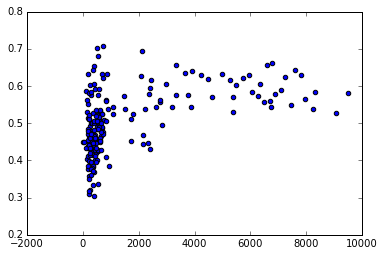

In [26]:
# number of all posts
#plt.scatter(countall[:-2], retention)  
#plt.scatter(countall[:-2], retention) # for breast cancer, every 2 months
plt.scatter(countall[1:-3], retention) # for breast cancer, every month
#plt.scatter(countall[8:96], retention) # for colorectal cancer, every 2 months
#plt.scatter(countall[1:64], retention)  # for colorectal cancer

# potential confounder: # of initial posts; more means higher density, and more means higher chance of self replies.
#plt.scatter(count0[1:64], retention)
#plt.scatter(countself[2:], retention)
#plt.scatter(countreply[2:], retention)

In [65]:
"""""
post_reply_ratio = [float(x)/y for x, y in zip(count0, countreply)]
plt.scatter(post_reply_ratio[4:], retention)

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-65-f2bce6d06d32>, line 3)

In [18]:
# in case of seasonailty, create a dummy variable for years 2009-2011 (short effects). These people are influenced by the ad campagign, but assume only for a certain time period
dummy_s = [0] * 34            #every 3 months
dummy_s.extend([1]*12)
dummy_s.extend([0]*19)
print len(dummy_s)
print dummy_s
# in case of seasonailty, create a dummy variable for years after 2009 (long effects). These people are influenced by the ad campagign. 
dummy_l = [0] * 34 
dummy_l.extend([1]*31)
print len(dummy_l)
print dummy_l

65
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
65
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [30]:
# in case of seasonailty, create a dummy variable for years 2009-2011 (short effects). These people are influenced by the ad campagign, but assume only for a certain time period
dummy_s = [0] * 51           #07/2000 - 12/08, 09-11, 12-16 every 2 months
dummy_s.extend([1]*18)
dummy_s.extend([0]*29)
print len(dummy_s)
print dummy_s
# in case of seasonailty, create a dummy variable for years after 2009 (long effects). These people are influenced by the ad campagign. 
dummy_l = [0] * 51 
dummy_l.extend([1]*47)
print len(dummy_l)
print dummy_l

98
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
98
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [27]:
# in case of seasonailty, create a dummy variable for years 2009-2011 (short effects). These people are influenced by the ad campagign, but assume only for a certain time period
dummy_s = [0] * 101           #08/2000 - 12/08, 09-11, 12-16 every month
dummy_s.extend([1]*36)
dummy_s.extend([0]*59)
print len(dummy_s)
print dummy_s
# in case of seasonailty, create a dummy variable for years after 2009 (long effects). These people are influenced by the ad campagign. 
dummy_l = [0] * 101 
dummy_l.extend([1]*95)
print len(dummy_l)
print dummy_l

196
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
196
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [66]:
# in case of seasonailty, create a dummy variable for years 2009-2011 (short effects). These people are influenced by the ad campagign, but assume only for a certain time period
dummy_s = [0] * 41          #2002/02 - 08/12, 09-11, 12-16 every 2 months
dummy_s.extend([1]*18)
dummy_s.extend([0]*29)
print len(dummy_s)
print dummy_s
# in case of seasonailty, create a dummy variable for years after 2009 (long effects). These people are influenced by the ad campagign. 
dummy_l = [0] * 41 
dummy_l.extend([1]*47)
print len(dummy_l)
print dummy_l

88
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
88
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [32]:
# save all variables to a csv file
rows = zip(retention,edge_size,node_size,density,recp,recp2,degree,countall[1:-3],dummy_s,dummy_l)   
with open('variables_breast_1m.csv', 'wb') as f:
#with open('variables_colore.csv', 'wb') as f:
    wr = csv.writer(f) 
    header = ['retention','edge size','node size','density','recp','recp2','degree','all post','short time effect','long time effect']
    wr.writerow(header)
    for row in rows:
        wr.writerow(row)

In [67]:
# save all variables to a csv file
rows = zip(retention,edge_size,node_size,density,trans,recp,recp2,cc,degree,countall[:-2],strong_tie, strong_tie2,dummy_s, dummy_l)   
#with open('variables_breast_2m.csv', 'wb') as f:
with open('variables_colore_2m.csv', 'wb') as f:
    wr = csv.writer(f) 
    header = ['retention','edge size','node size','density','trans','recp', 'recp2', 'clustering', 'degree','all post', 'strong tie',
              'strong tie2','short time effect','long time effect']
    wr.writerow(header)
    for row in rows:
        wr.writerow(row)

In [13]:
# save all variables to a csv file
rows = zip(countall[:-2], count0[:-2], countreply[:-2], countself[:-2])   
with open('variables_breast_post_num_2m.csv', 'wb') as f:
    wr = csv.writer(f) 
    header = ['allpostnum','startpostnum','replynum','selfnum']
    wr.writerow(header)
    for row in rows:
        wr.writerow(row)

In [17]:
# save all variables to a csv file
rows = zip(diameter)   
with open('shortest_path_breast.csv', 'wb') as f:
    wr = csv.writer(f) 
    header = ['diameter',]
    wr.writerow(header)
    for row in rows:
        wr.writerow(row)

# Is the relationship bw density and retention by random?

In [39]:
#check networks for every two months

#import scipy.stats as stats

zscores_recp = []
#zscores_density = []
for i in range(3, 101):
    indegree_sequence = list(graphs[i].in_degree().values())
    outdegree_sequence = list(graphs[i].out_degree().values())

    #model_stat_density = []
    model_stat_recp = []
    for j in range(1000):
        null_graph = nx.directed_configuration_model(indegree_sequence, outdegree_sequence)
        null_graph = nx.DiGraph(null_graph) # removes parallel edges
        null_graph.remove_edges_from(null_graph.selfloop_edges()) # removes self-loops

        # Calculate the model's density and reciprocity and add it to the list
        #model_stat_density.append(nx.density(null_graph))
        model_stat_recp.append(reciprocity(null_graph))
    
    real_stat_recp = reciprocity(graphs[i])
    #real_stat_density = nx.density(graphs[i])
    
    zs_recp = stats.zscore([real_stat_recp] + model_stat_recp)
    #zs_density = stats.zscore([real_stat_density] + model_stat_density)
    #print i-2, zs_recp[0], zs_density[0]
    zscores_recp.append(zs_recp[0])
    #zscores_density.append(zs_density[0])

1 -0.242835137141 2.4971913688
2 1.84693459075 5.297070255
3 2.90022348505 9.06197805674
4 3.30164148815 11.1611181798
5 7.87052338111 11.9217796578
6 3.59411578232 11.7220303755
7 4.01684078625 9.9455391155
8 1.56959906092 7.57805357097
9 0.419284655192 6.37225107545
10 3.25494614776 7.64530979781
11 2.98465390046 8.61711609305
12 3.77493315023 13.3372263567
13 5.2231649951 11.252661648
14 3.77095472509 10.5190954837
15 4.25776060088 10.4263971059
16 3.43407339978 7.02087828264
17 3.62247475412 7.38392454964
18 1.9279355527 10.3675815734
19 3.97738193193 10.7238485578
20 2.47240999004 9.60630520549
21 1.87722465541 8.76142646944
22 5.36110092646 9.25657349455
23 5.25729610578 8.52046339368
24 2.28805893328 6.51684280214
25 3.09299270089 7.10966370767
26 3.74790603921 8.03665955101
27 3.80864222211 4.89053556303
28 -0.746510064234 4.91941221739
29 2.87376886227 5.79504910281
30 0.0454029552321 4.3102864996
31 2.45727753071 4.15949659667
32 1.35054188741 3.94585600247
33 1.69600617263 3

In [40]:
print len(zscores_recp)
print len(zscores_density)
# save all variables to a csv file
rows = zip(zscores_recp, zscores_density)   
with open('variables_breast_zscores_2m.csv', 'wb') as f:
    wr = csv.writer(f) 
    header = ['zscore_recp','zscore_density']
    wr.writerow(header)
    for row in rows:
        wr.writerow(row)

98
98


In [23]:
# check if reciprocity is random
import scipy.stats as stats

indegree_sequence = list(graphs[20].in_degree().values())
outdegree_sequence = list(graphs[20].out_degree().values())

model_stat = []
for j in range(1000):
    null_graph = nx.directed_configuration_model(indegree_sequence, outdegree_sequence)
    null_graph = nx.DiGraph(null_graph) # removes parallel edges
    null_graph.remove_edges_from(null_graph.selfloop_edges()) # removes self-loops

    # Calculate the model's assortativity and add it to the list
    #model_stat.append(nx.transitivity(null_graph))
    model_stat.append(reciprocity(null_graph))

#real_stat = nx.transitivity(graphs[2])
real_stat = reciprocity(graphs[20])

zscores = stats.zscore([real_stat] + model_stat)
zscores[0]

2.0022423484508467

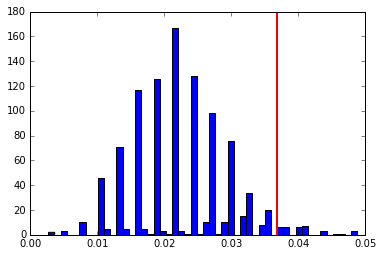

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

# Use the histogram function to plot the distribution of assortativity coefficients
plt.hist(model_stat, bins=50)

# axvline produces a vertical line at the designated x position on the graph
plt.axvline(real_stat, lw=2, color="red") #lw = 2 makes the line thicker
plt.show()

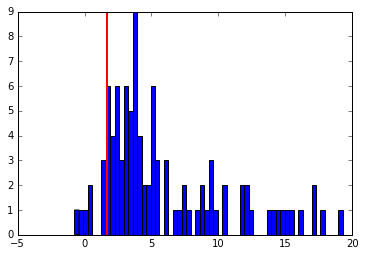

In [49]:
# Use the histogram function to plot the distribution of zscore for reciprocity
plt.hist(zscores_recp, bins=60)

# axvline produces a horizontal line at the designated x position on the graph
plt.axvline(1.645, lw=2, color="red") #1.645 is the one-tailed z statistic at 0.05 level
plt.show()

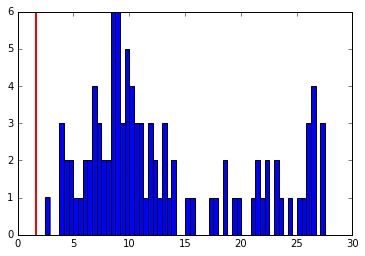

In [50]:
plt.hist(zscores_density, bins=60)

# axvline produces a horizontal line at the designated x position on the graph
plt.axvline(1.645, lw=2, color="red") #lw = 1.645 makes the line thicker, one-tail z statistic at 0.05 level
plt.show()

In [ ]:
# check density, compared it with random networks
prob = []
for i in range(65):
    prob.append(random.uniform(0, 1))
# print prob

rnd_graphs = []
for n, p in zip(node_size, prob):
    random = nx.erdos_renyi_graph(n=n, p=p, seed=100, directed=True)
    rnd_graphs.append(random)
print len(rnd_graphs)

In [51]:
zscores_recp = []
#zscores_density = []
for i in range(3, 10):
    indegree_sequence = list(graphs[i].in_degree().values())
    outdegree_sequence = list(graphs[i].out_degree().values())

    model_stat_density = []
    #model_stat_recp = []
    for j in range(10):
        null_graph = nx.directed_configuration_model(indegree_sequence, outdegree_sequence)
        null_graph = nx.DiGraph(null_graph) # removes parallel edges
        null_graph.remove_edges_from(null_graph.selfloop_edges()) # removes self-loops

        # Calculate the model's density and reciprocity and add it to the list
        model_stat_density.append(nx.density(null_graph))
        #model_stat_recp.append(reciprocity(null_graph))
    
    #real_stat_recp = reciprocity(graphs[i])
    real_stat_density = nx.density(graphs[i])
    print i-2, real_stat_density, model_stat_density
    
    #zs_recp = stats.zscore([real_stat_recp] + model_stat_recp)
    #zs_density = stats.zscore([real_stat_density] + model_stat_density)
    #print i-2, zs_recp[0], zs_density[0]
    #zscores_recp.append(zs_recp[0])
    #zscores_density.append(zs_density[0])

1 0.0772058823529 [0.0625, 0.0661764705882353, 0.0625, 0.06985294117647059, 0.0625, 0.0661764705882353, 0.0661764705882353, 0.06985294117647059, 0.0625, 0.0625]
2 0.0609756097561 [0.05060975609756098, 0.04939024390243903, 0.04939024390243903, 0.05060975609756098, 0.05060975609756098, 0.05365853658536585, 0.05121951219512195, 0.05, 0.04939024390243903, 0.05060975609756098]
3 0.0505952380952 [0.04092261904761905, 0.03993055555555555, 0.040674603174603176, 0.041666666666666664, 0.040426587301587304, 0.04141865079365079, 0.04092261904761905, 0.03968253968253968, 0.040674603174603176, 0.04141865079365079]
4 0.0634950018512 [0.05220288781932617, 0.052943354313217325, 0.05220288781932617, 0.05275823768974454, 0.052017771195853386, 0.051277304701962234, 0.05275823768974454, 0.05109218807848945, 0.052017771195853386, 0.04887078859681599]
5 0.0350550964187 [0.02871900826446281, 0.03002754820936639, 0.02865013774104683, 0.02975206611570248, 0.02913223140495868, 0.029545454545454545, 0.02858126721

In [11]:
"""""
prob = []
for i in range(65):
    prob.append(random.uniform(0, 1))
# print prob

rnd_graphs = []
for n, p in zip(node_size, prob):
    random = nx.erdos_renyi_graph(n=n, p=p, seed=100, directed=True)
    rnd_graphs.append(random)
print len(rnd_graphs)

65


In [47]:
indegree_seq = []
outdegree_seq = []
for i in range(65):
    indegree_seq.append(list(graphs[i+2].in_degree().values())) 
    outdegree_seq.append(list(graphs[i+2].out_degree().values()))

rnd_graphs = []
for i in range(65):
    null_graph = nx.directed_configuration_model(indegree_seq[i], outdegree_seq[i])
    null_graph = nx.DiGraph(null_graph) # removes parallel edges
    null_graph.remove_edges_from(null_graph.selfloop_edges()) # removes self-loops
    rnd_graphs.append(reciprocity(null_graph))
print len(rnd_graphs)

65


In [49]:
print rnd_graphs

[0.08, 0.10695187165775401, 0.13808463251670378, 0.09935897435897435, 0.09375, 0.059574468085106386, 0.09523809523809523, 0.07551020408163266, 0.0838150289017341, 0.08267090620031796, 0.01812688821752266, 0.02414113277623027, 0.061381074168797956, 0.03803486529318542, 0.015012510425354461, 0.02219482120838471, 0.038461538461538464, 0.05811138014527845, 0.0, 0.024213075060532687, 0.02072538860103627, 0.011267605633802818, 0.04081632653061224, 0.07038123167155426, 0.050793650793650794, 0.1, 0.04057971014492753, 0.01556420233463035, 0.05351170568561873, 0.10619469026548672, 0.10454545454545454, 0.08284023668639054, 0.0590318772136954, 0.09251968503937008, 0.11800860479409957, 0.17115472387037883, 0.16308040770101925, 0.16689432509623742, 0.11976549413735343, 0.09664642196989702, 0.16130988477865374, 0.15243243243243243, 0.14916173570019725, 0.16039481801357186, 0.16506101477199744, 0.13695090439276486, 0.10685483870967742, 0.093841642228739, 0.12425478506432382, 0.12021857923497267, 0.092

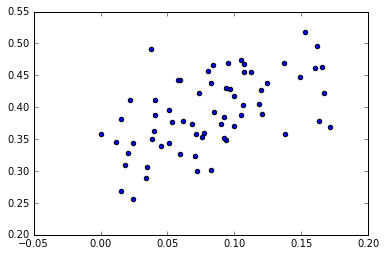

In [52]:
plt.scatter(rnd_graphs, retention)  # we should randomize p. 

In [24]:
import scipy.stats as stats

indegree_sequence = list(graphs[20].in_degree().values())
outdegree_sequence = list(graphs[20].out_degree().values())

model_stat = []
for j in range(1000):
    null_graph = nx.directed_configuration_model(indegree_sequence, outdegree_sequence)
    null_graph = nx.DiGraph(null_graph) # removes parallel edges
    null_graph.remove_edges_from(null_graph.selfloop_edges()) # removes self-loops

    # Calculate the model's assortativity and add it to the list
    #model_stat.append(nx.transitivity(null_graph))
    model_stat.append(reciprocity(null_graph))

#real_stat = nx.transitivity(graphs[2])
real_stat = reciprocity(graphs[20])

zscores = stats.zscore([real_stat] + model_stat)
zscores[0]

0.12839517332194378

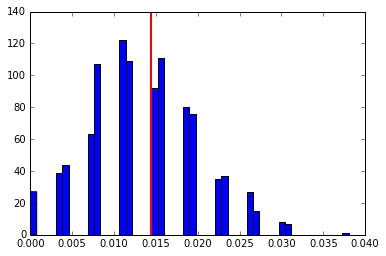

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

# Use the histogram function to plot the distribution of assortativity coefficients
plt.hist(model_stat, bins=50)

# axvline produces a vertical line at the designated x position on the graph
plt.axvline(real_stat, lw=2, color="red") #lw = 2 makes the line thicker
plt.show()

In [29]:
import scipy.stats as stats

zscores = []
for i in range(2, 67):
    indegree_sequence = list(graphs[i].in_degree().values())
    outdegree_sequence = list(graphs[i].out_degree().values())

    model_stat = []
    for j in range(1000):
        null_graph = nx.directed_configuration_model(indegree_sequence, outdegree_sequence)
        null_graph = nx.DiGraph(null_graph) # removes parallel edges
        null_graph.remove_edges_from(null_graph.selfloop_edges()) # removes self-loops

        # Calculate the model's assortativity and add it to the list
        #model_stat.append(nx.transitivity(null_graph))
        model_stat.append(reciprocity(null_graph))

    #real_stat = nx.transitivity(graphs[2])
    real_stat = reciprocity(graphs[i])
    
    zs = stats.zscore([real_stat] + model_stat)
    zscores.append(zs[0])

KeyboardInterrupt: 

In [30]:
print len(zscores)
zscores

37


[1.4136552088643886,
 3.7526787673749666,
 6.4599772431948113,
 6.6513884676100288,
 4.10829371822763,
 1.7076733390139305,
 4.5038116747087908,
 5.3945984994665723,
 6.6058413445235251,
 4.2956825915142494,
 4.3457909358400366,
 3.5000565112661381,
 4.4266686727656435,
 2.5542176431868575,
 6.6295482889238162,
 4.7660037925699674,
 4.3384120474271999,
 2.4560583763704278,
 0.11770493772946962,
 2.4149756550186332,
 2.3574654057307733,
 2.8242062968259622,
 2.7036537605145998,
 4.1487679410442242,
 2.5224367899525526,
 7.3356381386190401,
 4.886195527109221,
 2.4437943083842635,
 3.4446432980587547,
 6.3053350374585122,
 5.9532196780975797,
 4.9193267611118738,
 5.007059586147494,
 9.1060092000722239,
 10.341133588384306,
 18.963856508691237,
 20.906767687360148]

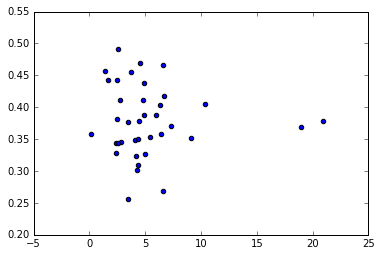

In [32]:
plt.scatter(zscores, retention[:37])

In [72]:
import scipy.stats as stats
zscores = stats.zscore([real_stat] + model_stat)

# Just print out the first score which corresponds to the real network
print(zscores[0])

4.04880914455


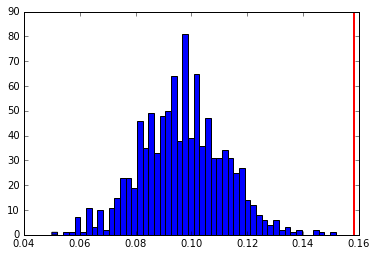

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt

# Use the histogram function to plot the distribution of assortativity coefficients
plt.hist(model_stat, bins=50)

# axvline produces a vertical line at the designated x position on the graph
plt.axvline(real_stat, lw=2, color="red") #lw = 2 makes the line thicker
plt.show()

In [12]:
for g in rnd_graphs:
    print nx.info(g)

Name: gnp_random_graph(35,0.165169413271)
Type: DiGraph
Number of nodes: 35
Number of edges: 187
Average in degree:   5.3429
Average out degree:   5.3429
Name: gnp_random_graph(77,0.985316183531)
Type: DiGraph
Number of nodes: 77
Number of edges: 5752
Average in degree:  74.7013
Average out degree:  74.7013
Name: gnp_random_graph(123,0.623244389241)
Type: DiGraph
Number of nodes: 123
Number of edges: 9365
Average in degree:  76.1382
Average out degree:  76.1382
Name: gnp_random_graph(146,0.0148458846439)
Type: DiGraph
Number of nodes: 146
Number of edges: 302
Average in degree:   2.0685
Average out degree:   2.0685
Name: gnp_random_graph(149,0.00908238368338)
Type: DiGraph
Number of nodes: 149
Number of edges: 176
Average in degree:   1.1812
Average out degree:   1.1812
Name: gnp_random_graph(88,0.0107695833271)
Type: DiGraph
Number of nodes: 88
Number of edges: 69
Average in degree:   0.7841
Average out degree:   0.7841
Name: gnp_random_graph(113,0.531002063675)
Type: DiGraph
Number o

In [13]:
edge_size2 = []
density2 = []
#trans2 = []
degree2 = []
recp2 = []
#cc2 = []
for g in rnd_graphs: 
    e = g.size()
    d = nx.density(g)
    #t = nx.transitivity(g)
    r = reciprocity(g)
    #c = nx.average_clustering(g)
    dg = np.mean(nx.degree(g).values())
    
    edge_size2.append(e)
    density2.append(d)
    #cc2.append(c)
    recp2.append(r)
    #trans2.append(t)
    degree2.append(dg)

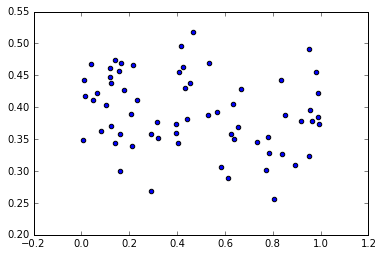

In [14]:
plt.scatter(density2, retention)

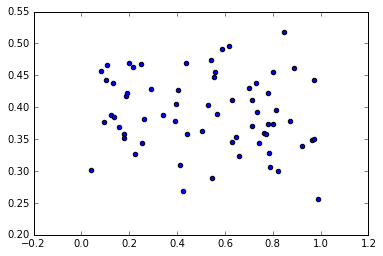

In [30]:
plt.scatter(cc2, retention)

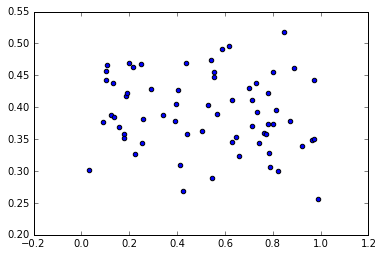

In [34]:
plt.scatter(trans2, retention)

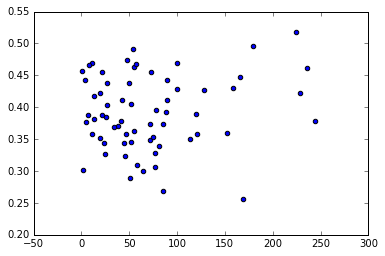

In [28]:
plt.scatter(degree2, retention)

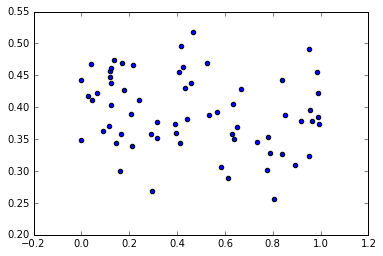

In [15]:
plt.scatter(recp2, retention)

In [31]:
print cc2

[0.08020408163265307, 0.5567772752179885, 0.17947230623278956, 0.18801462907698369, 0.9647027783362199, 0.10461810916356366, 0.19773310223951399, 0.6475977479011932, 0.10622669831576809, 0.04029304029304028, 0.4118731310733478, 0.9896398039114331, 0.3913829202368269, 0.5879626825571372, 0.4242308324436207, 0.7124572734426109, 0.9747118854526101, 0.9737819475926911, 0.44053964289668596, 0.25195430102114563, 0.7824288391130813, 0.6278473658822348, 0.6310295505806679, 0.6576688648093136, 0.7419065381715344, 0.7153931203771536, 0.12423629417330699, 0.2596993873859747, 0.09433987438397741, 0.5313568387286433, 0.3401723995230466, 0.7301511423817649, 0.22301054435859807, 0.17857304736671598, 0.3940011223448827, 0.1578861179900872, 0.8719081442279014, 0.7817182648488791, 0.40316546963231936, 0.29113960828818874, 0.6159811181436973, 0.8479752481419184, 0.5561895095781926, 0.8891763068511679, 0.2159330763120006, 0.4391814546592606, 0.25015621976995533, 0.700414091387623, 0.13390793725053873, 0.5

In [32]:
print density2

[0.06050420168067227, 0.5587833219412167, 0.17659602825536452, 0.18233349078885214, 0.9647197533103573, 0.09482758620689655, 0.1934260429835651, 0.6474846992088371, 0.10085011185682327, 0.02282333051563821, 0.4117691916624301, 0.9896339488176222, 0.39160194813742266, 0.5885426049360476, 0.42403940397761813, 0.712529016876843, 0.9747257987601335, 0.9737955346650999, 0.44075829383886256, 0.2519035164196455, 0.7824950007691125, 0.6275683665927568, 0.6327886710239652, 0.6575956626003545, 0.7412274759517681, 0.7156455520941503, 0.12353823088455772, 0.2571428571428571, 0.09290206648697215, 0.5287528005974608, 0.34241763565891475, 0.7301416917131817, 0.22224989622249897, 0.1794871794871795, 0.3944002765295541, 0.1578060364639191, 0.8719432127428778, 0.7817468680482379, 0.40325128600061216, 0.2909121416137083, 0.6160227139679194, 0.8479549750816291, 0.5562993940620328, 0.8891802579682336, 0.21635443709022303, 0.4391941391941392, 0.24978356213907202, 0.7002468896742025, 0.1334832615819572, 0.56

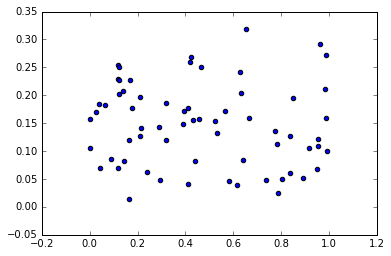

In [16]:
plt.scatter(recp2, recp)

In [17]:
print recp2
print recp
print node_size

[0.11764705882352941, 0.9833101529902643, 0.6302189001601709, 0.026490066225165563, 0.0, 0.0, 0.524297815425769, 0.7810458298432452, 0.21573498964803312, 0.7742436705968376, 0.8922655871368703, 0.8045619491964748, 0.9162021864459489, 0.9514219879422998, 0.2948464562745723, 0.044102906782492485, 0.6399312025225742, 0.8370932602431653, 0.1639389736477115, 0.4104891578416541, 0.7866679724480136, 0.7357221720365352, 0.23915094339622642, 0.9523496549457772, 0.1446360153256705, 0.11634349030470914, 0.5331448763250883, 0.44002486016159104, 0.3174061433447099, 0.12376681614349776, 0.8495487172198138, 0.4563106796116505, 0.8381833016045689, 0.3177605930849364, 0.6335116511016411, 0.6523485888379256, 0.9623606652472265, 0.9874948500360127, 0.1785416550880898, 0.6672907001215609, 0.41712371575643087, 0.4663039056923797, 0.11868404126069038, 0.12202670439472986, 0.4253161306887477, 0.16868166830566322, 0.038282208588957055, 0.4334426302890587, 0.12416261825620047, 0.20894009708219982, 0.9874345777

# Text mining

In [659]:
#print len(data)   # number of initial posts

27215


Extract all posting texts by year

In [57]:
alltext = {}
for key in data:
    year = data[key]['post_time'].split(', ')[1].split()[0]
    if year not in alltext:
        alltext[year] = data[key]['text']
    else:
        alltext[year] = alltext[year] + '*****' + data[key]['text']   # use ****** to separate each post text
        
    i = 0
    while i < 50:
        try:  # handle exception: when i is out of list range
            year = data[key]['reply'][i]['post_time'].split(', ')[1]
            if data[key]['user'] == data[key]['reply'][i]['user']: 
                if year not in alltext:
                    alltext[year] = data[key]['reply'][i]['text']
                else:
                    alltext[year] = alltext[year] + '*****' + (data[key]['reply'][i]['text'])
            else:    
                if year not in alltext:
                    alltext[year] = alldata[key]['reply'][i]['text']
                else:
                    alltext[year] = alltext[year] + '*****' + (data[key]['reply'][i]['text'])
        except:
            pass
        i += 1
        
print len(alltext)

Traceback (most recent call last):
  File "C:\Anaconda2\envs\gl-env\lib\site-packages\IPython\core\ultratb.py", line 1118, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "C:\Anaconda2\envs\gl-env\lib\site-packages\IPython\core\ultratb.py", line 300, in wrapped
    return f(*args, **kwargs)
  File "C:\Anaconda2\envs\gl-env\lib\site-packages\IPython\core\ultratb.py", line 345, in _fixed_getinnerframes
    records = fix_frame_records_filenames(inspect.getinnerframes(etb, context))
  File "C:\Anaconda2\envs\gl-env\lib\inspect.py", line 1049, in getinnerframes
    framelist.append((tb.tb_frame,) + getframeinfo(tb, context))
  File "C:\Anaconda2\envs\gl-env\lib\inspect.py", line 1009, in getframeinfo
    filename = getsourcefile(frame) or getfile(frame)
  File "C:\Anaconda2\envs\gl-env\lib\inspect.py", line 454, in getsourcefile
    if hasattr(getmodule(object, filename), '__loader__'):
  File "C:\Anaconda2\envs\gl-env\lib\inspect.py", line

ERROR: Internal Python error in the inspect module.
Below is the traceback from this internal error.


Unfortunately, your original traceback can not be constructed.



IndexError: string index out of range

In [35]:
#alltext['2000']

Separate texts by time and post types

In [21]:
post_text = {}
reply_text = {}
self_reply = {}
for key in data:
    #look at the initial post
    month = data[key]['post_time'].split()[0]
    year = data[key]['post_time'].split(', ')[1]  # '2000 ', '2001 ' note the blanck after the number
    if year+month not in post_text:
        post_text[year+month] = data[key]['text']
    else:
        post_text[year+month] = post_text[year+month] + '*****' + data[key]['text']
    
    # look at the replies     
    i = 0
    while i < 50:
        try:
            month = data[key]['reply'][i]['post_time'].split()[0]
            year = data[key]['reply'][i]['post_time'].split(', ')[1]
            if data[key]['user'] == data[key]['reply'][i]['user']:  #identify self reply
                if year+month not in self_reply:
                    self_reply[year+month] = data[key]['reply'][i]['text']
                else:
                    self_reply[year+month] = self_reply[year+month] + '*****' + (data[key]['reply'][i]['text'])
            elif data[key]['user'] != data[key]['reply'][i]['user']:    
                if year+month not in reply_text:
                    reply_text[year+month] = data[key]['reply'][i]['text']
                else:
                    reply_text[year+month] = reply_text[year+month] + '*****' + (data[key]['reply'][i]['text'])
        except:
            pass
        i += 1
        
print len(post_text)
print len(reply_text)
print len(self_reply)

193
193
179


In [22]:
post_text3 = {}
reply_text3 = {}
self_reply3 = {}
for time in post_text:
    if time.split()[1] in set(['Jan', 'Feb', 'Mar']):
        if time.split()[0]+' '+'q1' not in post_text3:
            post_text3[time.split()[0]+' '+'q1'] = post_text[time]
        else:
            post_text3[time.split()[0]+' '+'q1'] = post_text3[time.split()[0]+' '+'q1'] + '*****' + post_text[time]
    elif time.split()[1] in set(['Apr', 'May', 'Jun']):
        if time.split()[0]+' '+'q2' not in post_text3:        
            post_text3[time.split()[0]+' '+'q2'] = post_text[time]
        else:
            post_text3[time.split()[0]+' '+'q2'] = post_text3[time.split()[0]+' '+'q2'] + '*****' + post_text[time]
    elif time.split()[1] in set(['Jul', 'Aug', 'Sep']):
        if time.split()[0]+' '+'q3' not in post_text3:
            post_text3[time.split()[0]+' '+'q3'] = post_text[time]
        else:
            post_text3[time.split()[0]+' '+'q3'] = post_text3[time.split()[0]+' '+'q3'] + '*****' + post_text[time]
    else:
        if time.split()[0]+' '+'q4' not in post_text3:
            post_text3[time.split()[0]+' '+'q4'] = post_text[time]
        else:
            post_text3[time.split()[0]+' '+'q4'] = post_text3[time.split()[0]+' '+'q4'] + '*****' + post_text[time]

for time in reply_text:
    if time.split()[1] in set(['Jan', 'Feb', 'Mar']):
        if time.split()[0]+' '+'q1' not in reply_text3:
            reply_text3[time.split()[0]+' '+'q1'] = reply_text[time]
        else:
            reply_text3[time.split()[0]+' '+'q1'] = reply_text3[time.split()[0]+' '+'q1'] + '*****' + reply_text[time]
    elif time.split()[1] in set(['Apr', 'May', 'Jun']):
        if time.split()[0]+' '+'q2' not in reply_text3:        
            reply_text3[time.split()[0]+' '+'q2'] = reply_text[time]
        else:
            reply_text3[time.split()[0]+' '+'q2'] = reply_text3[time.split()[0]+' '+'q2'] + '*****' + reply_text[time]
    elif time.split()[1] in set(['Jul', 'Aug', 'Sep']):
        if time.split()[0]+' '+'q3' not in reply_text3:
            reply_text3[time.split()[0]+' '+'q3'] = reply_text[time]
        else:
            reply_text3[time.split()[0]+' '+'q3'] = reply_text3[time.split()[0]+' '+'q3'] + '*****' + reply_text[time]
    else:
        if time.split()[0]+' '+'q4' not in reply_text3:
            reply_text3[time.split()[0]+' '+'q4'] = reply_text[time]
        else:
            reply_text3[time.split()[0]+' '+'q4'] = reply_text3[time.split()[0]+' '+'q4'] + '*****' + reply_text[time]

for time in self_reply:
    if time.split()[1] in set(['Jan', 'Feb', 'Mar']):
        if time.split()[0]+' '+'q1' not in self_reply3:
            self_reply3[time.split()[0]+' '+'q1'] = self_reply[time]
        else:
            self_reply3[time.split()[0]+' '+'q1'] = self_reply3[time.split()[0]+' '+'q1'] + '*****' + self_reply[time]
    elif time.split()[1] in set(['Apr', 'May', 'Jun']):
        if time.split()[0]+' '+'q2' not in self_reply3:        
            self_reply3[time.split()[0]+' '+'q2'] = self_reply[time]
        else:
            self_reply3[time.split()[0]+' '+'q2'] = self_reply3[time.split()[0]+' '+'q2'] + '*****' + self_reply[time]
    elif time.split()[1] in set(['Jul', 'Aug', 'Sep']):
        if time.split()[0]+' '+'q3' not in self_reply3:
            self_reply3[time.split()[0]+' '+'q3'] = self_reply[time]
        else:
            self_reply3[time.split()[0]+' '+'q3'] = self_reply3[time.split()[0]+' '+'q3'] + '*****' + self_reply[time]
    else:
        if time.split()[0]+' '+'q4' not in self_reply3:
            self_reply3[time.split()[0]+' '+'q4'] = self_reply[time]
        else:
            self_reply3[time.split()[0]+' '+'q4'] = self_reply3[time.split()[0]+' '+'q4'] + '*****' + self_reply[time]        
        
        
print len(post_text3)
print len(reply_text3)
print len(self_reply3)

67
66
62


In [36]:
""""
texts = []
for key in post_text:
    texts.append(post_text)
print texts[0]

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-36-399fdba25e5a>, line 5)

Whole texts, including all postings and replies

In [574]:
""""
text3 = {}
for time in alltext:
    if time.split()[1] in set(['Jan', 'Feb', 'Mar']):
        if time.split()[0]+' '+'q1' not in text3:
            text3[time.split()[0]+' '+'q1'] = alltext[time]
        else:
            text3[time.split()[0]+' '+'q1'] = text3[time.split()[0]+' '+'q1'] + '*****' + alltext[time]
    elif time.split()[1] in set(['Apr', 'May', 'Jun']):
        if time.split()[0]+' '+'q2' not in text3:        
            text3[time.split()[0]+' '+'q2'] = alltext[time]
        else:
            text3[time.split()[0]+' '+'q2'] = text3[time.split()[0]+' '+'q2'] + '*****' + alltext[time]
    elif time.split()[1] in set(['Jul', 'Aug', 'Sep']):
        if time.split()[0]+' '+'q3' not in text3:
            text3[time.split()[0]+' '+'q3'] = alltext[time]
        else:
            text3[time.split()[0]+' '+'q3'] = text3[time.split()[0]+' '+'q3'] + '*****' + alltext[time]
    else:
        if time.split()[0]+' '+'q4' not in text3:
            text3[time.split()[0]+' '+'q4'] = alltext[time]
        else:
            text3[time.split()[0]+' '+'q4'] = text3[time.split()[0]+' '+'q4'] + '*****' + alltext[time]

print len(text3)

67


Separate texts

In [37]:
#post_text3['2000 q4']

In [38]:
#reply_text3['2000 q4']

In [39]:
#self_reply3['2000 q4']

In [276]:
""""
for key in post_text3:    
    texts = post_text3[key].split('*****')  # a list of text    
    with open('breast/text'+key+'.csv', 'w') as f:
        wr = csv.writer(f) 
        for text in texts:
            wr.writerow(text)        

Randomly sample posts and save them to file

In [453]:
""""
import random
random.seed(100)
f = open('breast/sample_post.txt', 'w')
for key in post_text3:     
    texts = post_text3[key].split('*****')  # a list of text     
    rnd_nums = random.sample(range(len(texts)), int(len(texts)*0.03))
    for i in rnd_nums:
        f.write("%s\n" % str(texts[i]))

In [40]:
# sample initial posts
import random
random.seed(100)
train_post = set()
count = 0
for key in post_text3:     
    texts = post_text3[key].split('*****')  # a list of text     
    rnd_nums = random.sample(range(len(texts)), int(len(texts)*0.03))
    for i in rnd_nums:
        count += 1
        print count, texts[i] 
        train_post.add(texts[i])
print len(train_post)

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-40-b9538d9eda26>, line 14)

In [41]:
# sample self-replies
import random
random.seed(100)
train_self_reply = set()
count = 0
for key in self_reply3:     
    texts = self_reply3[key].split('*****')  # a list of text     
    rnd_nums = random.sample(range(len(texts)), int(len(texts)*0.01))
    for i in rnd_nums:
        count += 1
        print count, texts[i] 
        train_self_reply.add(texts[i])
print len(train_self_reply)

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-41-fabcefa71cfd>, line 14)

In [42]:
# sample replies
import random
random.seed(100)
train_reply = set()
count = 0
for key in reply_text3:     
    texts = reply_text3[key].split('*****')  # a list of text     
    rnd_nums = random.sample(range(len(texts)), int(len(texts)*0.003))
    for i in rnd_nums:
        count += 1
        print count, texts[i] 
        train_reply.add(texts[i])
print len(train_reply)

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-42-262818076599>, line 14)

In [521]:
print int(len(post_text3['2012 q4'].split('*****'))*0.03)
print len(post_text3['2012 q4'].split('*****'))

random.seed(100)
random.sample(range(707), 10)

21
707


[102, 321, 544, 498, 517, 306, 565, 376, 56, 322]

In [470]:
s = 'Actually, knowing that the scheduling mess is resolved, I am in a great mood!'
if s in train_self_reply:
    print 'not'

not


In [429]:
for key in post_text3: 
    f = open('breast/post'+key+'.txt', 'w')
    texts = post_text3[key].split('*****')  # a list of text     
    for text in texts:
        f.write("%s\n" % text) 
        
for key in self_reply3: 
    f = open('breast/self_reply'+key+'.txt', 'w')
    texts = self_reply3[key].split('*****')  # a list of text     
    for text in texts:
        f.write("%s\n" % text)

# Preprocess data

Get a list of lists of words

In [23]:
stopword_list = []
f = open('stopwords.txt','r')
for line in f.readlines():
    if line != '\n':
        stopword_list.append(line[:-1])
#print stopword_list
stopwords = set(stopword_list)
#stopwords

In [25]:
cleaned_self = {}
for key in self_reply3:
    texts = self_reply3[key].split('*****')  # a list of posts
    cleaned_texts = []
    for text in texts:  # text is a string (post as the unit)
        cleaned_text = []
        # lowercase, remove stopwords, including punctuationtokenize 
        text = ''.join(c for c in text if c not in (',', '!', '?', '.', ':', '(', ')',';') and c.isdigit() == False) #deal with characters in a string like: happy, Hello! 65
        #text = text.replace(word, 'swords')
        text = text.replace('-', ' ')
        text = text.replace('<p>', '')
        text = text.replace('</p>', '')        
        text = text.replace('<div>', '')
        text = text.replace('</div>', '')
        text = text.replace('<br>', '')
        text = text.replace('<br/>', '')
        text = text.replace('\\n', '')
        text = text.lower().split()
        for w in text:
            if w not in stopwords:
                cleaned_text.append(w)  # get a list of cleaned words (post as a unit)                         
        cleaned_texts.append(cleaned_text)   
    cleaned_self[key] = cleaned_texts

In [28]:
print len(cleaned_self)
cleaned_self['2010 q4'][:2]

62


[[u'good',
  u'nurse',
  u'cea',
  u'stayed',
  u'alwaysthanks',
  u'good',
  u'thoughts*hugs*gail'],
 [u'hope',
  u'feel',
  u'reasonably',
  u'fine',
  u'l',
  u'understand',
  u'infussion',
  u'l',
  u'buy',
  u'magazines',
  u'news',
  u'papers',
  u'simply',
  u'l',
  u"can't"]]

In [30]:
thank = set(['thank', 'thanks', 'appreciate', 'appreciated', 'thankful', 'grateful'])
label = {}
for key in cleaned_self:
    lablist = []
    for wordlist in cleaned_self[key]:
        lab = ''
        if set.intersection(set(wordlist), thank) == set():
            lab = 0
        else:
            lab = 1
        lablist.append(lab)
    label[key] = lablist
print len(label)
print label['2010 q4']
#np.mean(label['2010 q4'])/len()

62
[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 

0.0051524478378424336

In [63]:
label['2016 q3']
print np.mean(label['2016 q3'])

0.460674157303


In [61]:
# count number of appreciation replies
label_count = {}
for key in label:  # the label[key] is a list of 1 and 0
    s = sum(label[key])        
    label_count[key] = s
print label_count['2016 q3']
print len(label_count)     # from 2000 q3 to 2017 q1, but we only focus on 2000 q3 to 2006 q3

123
62


In [60]:
import collections
label_count = collections.OrderedDict(sorted(label_count.items()))
num = [x for x in label_count.values()]
appre = []
for i in range(62):   #65 for breast cancer
    r = float(num[i])/count0[i]
    appre.append(r)
print len(appre)
#print appre
print num
print label_count
print count0

62
[0, 3, 2, 1, 9, 14, 34, 50, 108, 114, 64, 75, 118, 130, 111, 78, 141, 126, 262, 192, 167, 137, 160, 94, 92, 86, 138, 349, 468, 521, 602, 643, 597, 488, 465, 606, 841, 563, 408, 408, 294, 405, 389, 355, 400, 276, 197, 210, 148, 145, 101, 175, 153, 139, 79, 102, 87, 113, 123, 83, 123, 17]
OrderedDict([(u'2001 q1', 0), (u'2002 q1', 3), (u'2002 q2', 2), (u'2002 q3', 1), (u'2003 q1', 9), (u'2003 q2', 14), (u'2003 q3', 34), (u'2003 q4', 50), (u'2004 q1', 108), (u'2004 q2', 114), (u'2004 q3', 64), (u'2004 q4', 75), (u'2005 q1', 118), (u'2005 q2', 130), (u'2005 q3', 111), (u'2005 q4', 78), (u'2006 q1', 141), (u'2006 q2', 126), (u'2006 q3', 262), (u'2006 q4', 192), (u'2007 q1', 167), (u'2007 q2', 137), (u'2007 q3', 160), (u'2007 q4', 94), (u'2008 q1', 92), (u'2008 q2', 86), (u'2008 q3', 138), (u'2008 q4', 349), (u'2009 q1', 468), (u'2009 q2', 521), (u'2009 q3', 602), (u'2009 q4', 643), (u'2010 q1', 597), (u'2010 q2', 488), (u'2010 q3', 465), (u'2010 q4', 606), (u'2011 q1', 841), (u'2011 q2',

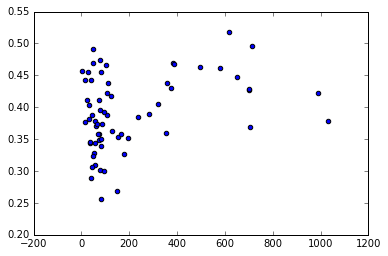

In [291]:
plt.scatter(num[:-2], retention)

ValueError: x and y must be the same size

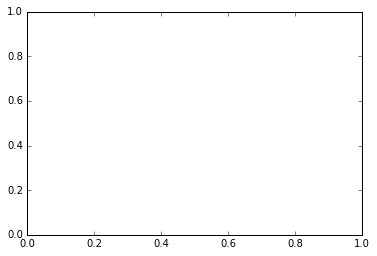

In [38]:
plt.scatter(appre, retention)

In [292]:
rows = zip(retention,edge_size,node_size,density,trans,recp,degree,cc,countall[2:],count0[2:],reply[2:],self[2:], appre, dummy_s,dummy_l)   
with open('variables.csv', 'w') as f:
    wr = csv.writer(f) 
    header = ['retention','edge size','node size','density','trans','recp','degree','clustering','all post','initial post','reply','self reply','appre', 'short time effect','long time effect']
    wr.writerow(header)
    for row in rows:
        wr.writerow(row)

In [362]:
with open('Big4OnlineReviewsfromIndeed2.csv', 'rb') as f:
    reader = csv.reader(f)
    rows = []
    for row in reader:
        rows.append(row)
jobtitle = []
for row in rows[19:826]:  #19-826
    #print row[0], row[5]
    jobtitle.append(row[5])
freq = Counter(jobtitle)
freq
y = [x for x in freq.values()]
y = sorted(y, reverse=True)
print y[:12]
print '***************'
"""
#top10 = set(y[:10])
"""
for i in y[:12]:
    for key in freq:
        if freq[key] == i:
            print key
            
print "*************"
for i in y[:12]:
    for key in freq:
        if freq[key] == 6:
            print key
print '************'
print freq

[60, 40, 28, 14, 13, 11, 8, 7, 7, 6, 6, 6]
***************
Senior Consultant
Consultant
Manager
Administrative Assistant
Senior Manager
Audit Senior
Executive Assistant
Business Analyst
Audit Senior Assistant
Business Analyst
Audit Senior Assistant
Tax Consultant
Senior Accountant
Consultant, Strategy & Operations
Tax Consultant
Senior Accountant
Consultant, Strategy & Operations
Tax Consultant
Senior Accountant
Consultant, Strategy & Operations
*************
Tax Consultant
Senior Accountant
Consultant, Strategy & Operations
Tax Consultant
Senior Accountant
Consultant, Strategy & Operations
Tax Consultant
Senior Accountant
Consultant, Strategy & Operations
Tax Consultant
Senior Accountant
Consultant, Strategy & Operations
Tax Consultant
Senior Accountant
Consultant, Strategy & Operations
Tax Consultant
Senior Accountant
Consultant, Strategy & Operations
Tax Consultant
Senior Accountant
Consultant, Strategy & Operations
Tax Consultant
Senior Accountant
Consultant, Strategy & Operations


In [346]:
with open('Big4OnlineReviewsfromIndeed.csv', 'rb') as f:
    reader = csv.reader(f)
    rows = []
    for row in reader:
        rows.append(row)
jobtitle = []
for row in rows[1:]:
    #print row[5]
    jobtitle.append(row[5])
#print jobtitle[:10]
#print len(jobtitle)
freq = Counter(jobtitle)
freq
y = [x for x in freq.values()]
y = sorted(y, reverse=True)
print y[:11]
"""
#top10 = set(y[:10])
"""
for i in y[:11]:
    for key in freq:
        if freq[key] == i:
            print key

[85, 72, 51, 50, 47, 37, 36, 35, 26, 24, 21]
Senior Consultant
Manager
Senior Associate
Executive Assistant
Consultant
Audit Associate
Administrative Assistant
Senior Manager

Experienced Associate
Associate
********************
Senior Consultant
Manager
Senior Associate
Executive Assistant
Consultant
Audit Associate
Administrative Assistant
Senior Manager

Experienced Associate
Associate


Get cleaned whole data

In [693]:
cleaned_whole_text = {}
for key in alltext:
    texts = alltext[key].split('*****')  # a list of posts
    cleaned_texts = []
    for text in texts:  # text is a string (post as the unit)
        cleaned_text = []
        # lowercase, remove stopwords, including punctuationtokenize 
        text = ''.join(c for c in text if c not in (',', '!', '?', '.', ':', '(', ')',';') and c.isdigit() == False) #deal with characters in a string like: happy, Hello! 65
        text = text.replace('-', ' ')
        text = text.lower().split()
        for w in text:
            if w not in stopwords:
                cleaned_text.append(w)  # get a list of cleaned words (post as a unit)                         
        cleaned_texts.append(cleaned_text)   
    cleaned_whole_text[key] = cleaned_texts

In [694]:
cleaned_whole_text['2000'][0]

[u'hi',
 u'everyone<br/>\\ni',
 u'read',
 u'couple',
 u'messages',
 u'jump',
 u'share</p>\\n<p>i',
 u'good',
 u'shape',
 u'bilateral',
 u'masectomy',
 u'dec',
 u'<br/>\\nhowever',
 u'fire',
 u'surgeon',
 u'refused',
 u'honor',
 u'oncologists',
 u'request',
 u'implant',
 u'port',
 u'me</p>\\n<p>she',
 u'ofther',
 u'dumb',
 u'stuff',
 u'like',
 u'hold',
 u'totally',
 u'unsanitary',
 u'paper',
 u'gown',
 u'bleeding',
 u'drain',
 u'site<br/>\\nwhile',
 u'pulled',
 u'staples',
 u'pull',
 u'nurse',
 u'stood',
 u'cut',
 u'tape',
 u'strips</p>\\n<p>the',
 u'tape',
 u'even',
 u'e',
 u'ones',
 u'allergic',
 u'to</p>\\n<p>it',
 u'learn',
 u'stand',
 u'treatment',
 u'world</p>\\n<p>my',
 u'spirits',
 u'good',
 u'due',
 u'tremendous',
 u'support',
 u'family',
 u'true',
 u'friends</p>\\n<p>i',
 u'enjoy',
 u'sharing',
 u'travel',
 u'road<br/>\\nac',
 u'chemo',
 u'start',
 u'surgeon',
 u'port',
 u'implant',
 u'then<br/>\\ncher']

In [514]:
# get cleaned test data
cleaned_post_text = {}
for key in post_text3:
    texts = post_text3[key].split('*****')  # a list of posts
    cleaned_texts = []
    for text in texts:  # text is a string (post as the unit)
        cleaned_text = []
        # lowercase, remove stopwords, including punctuationtokenize 
        if text not in train_post:
            text = ''.join(c for c in text if c not in (',', '!', '?', '.', ':', '(', ')',';') and c.isdigit() == False) #deal with characters in a string like: happy, Hello! 65
            text = text.replace('-', ' ')
            text = text.lower().split()
        else:
            continue
        for w in text:
            if w not in stopwords:
                cleaned_text.append(w)  # get a list of cleaned words (post as a unit)                         
        cleaned_texts.append(cleaned_text)   
    cleaned_post_text[key] = cleaned_texts

In [525]:
print len(cleaned_post_text['2011 q4']) + int(len(post_text3['2011 q4'].split('*****'))*0.03) 
print len(post_text3['2011 q4'].split('*****'))

882
892


In [516]:
""""
#print len(cleaned_post_text['2012 q4'])

cleaned_text = []
text = post_text3['2012 q4'].split('*****')[1]
print text
text = ''.join(c for c in text if c not in (',', '!', '?', '.', ':', '(', ')',';') and c.isdigit() == False) #deal with characters in a string like: happy, Hello! 65
text = text.replace('-', ' ')
text = text.lower().split()
for w in text:
    if w not in stopwords:
        cleaned_text.append(w)
#print cleaned_text
print cleaned_post_text['2001 q4'][1]


Are the steroids agreeing with you?  I am taking Dexamethason and I just was curious if anyone has been useing it, and how they react to it&gt;
[u'hi', u'everyone<br/>\\n', u'wish', u'merry', u'christmas', u'prayer', u'healthy', u'god', u'bless', u'debbie']


# Construct a dictionary of all the words - bag-of-words

In [405]:
# Let's call the dictionary word_space
from collections import defaultdict
word_space=defaultdict(int)
for key in cleaned_post_text:
    for text in cleaned_post_text[key]:
        for word in text:
            if word not in word_space:
                word_space[word]=len(word_space) 

print len(word_space)
print word_space['best']
print word_space['breast']

64706
1869
58


In [406]:
# build a sparse vector
def get_sparse_vec(doc, space):
    # create empty vector
    sparse_vec = np.zeros(len(word_space))
    for word in doc:
        try:
            sparse_vec[space[word]]=1
        except:
            continue
    return sparse_vec

texts_vecs = {}
for key in cleaned_post_text:
    text_vecs = [get_sparse_vec(text, word_space) for text in cleaned_post_text[key]]
    texts_vecs[key] = text_vecs
print len(texts_vecs)   # texts_vecs are the feature for SVM models

67


In [414]:
""""
count = 0
for vec in texts_vecs['2000 q4']:
    for i in vec:
        if i == 1:
            count += 1
            break
print count
print len(texts_vecs['2000 q4'])

126
126


In [387]:
"""
# remove punctuation
string = 'Supporters:<br/>\nGlobal Support - We Want to Hear Your Story!<br/>\nThe International Discussion Forum, a free multilingual exchange of opinions and experience without borders.  This groundbreaking project will provide support, on a global scale, for anyone who has suffered from breast cancer.  Contributed stories can be shared on The Power of Love - Everybody can help somebody.<br/>\nPlease respond to http://www.amberheart.org/I/forum.htm  if you would like to participate. If you are multilingual there is an opportunity to help translate characteristic stories received by The Amberheart Breast Cancer Foundation for other to enjoy.<br/>\nJuan Bello<br/>\nPublic Relations Volunteer, Project Coordinator<br/>\nAmberheart Breast Cancer Foundation'
out = "".join(c for c in string if c not in set(['to', 'the', 'a', 'an', '']) and c.isdigit() == False)
print out
out = out.lower().split(' ')
#print out
words = []
stop = set(['to', 'the', 'a', 'an', ''])
for w in out:
    if w not in stop:
        words.append(w)
#print words

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-387-6a0588f36b9a>, line 13)

# Build SVM model

In [ ]:
from sklearn import cross_validation
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.multiclass import OneVsRestClassifier

clf = OneVsRestClassifier(SVC(C=1, kernel = 'linear', gamma=1, verbose= False, probability=False))
clf.fit(tweets_vecs, labels_vecs)
print "\nDone fitting classifier on training data...\n"
#------------------------------------------------------------------------------------------
print "="*50, "\n"
print "Results with 10-fold cross validation:\n"
print "="*50, "\n"
#------------------------------------------------------------------------------------------
predicted = cross_validation.cross_val_predict(clf, tweets_vecs, labels_vecs, cv=10)
print "*"*20
print "\t accuracy_score\t", metrics.accuracy_score(labels_vecs, predicted)
print "*"*20
print "precision_score\t", metrics.precision_score(labels_vecs, predicted)
print "recall_score\t", metrics.recall_score(labels_vecs, predicted)
print "\nclassification_report:\n\n", metrics.classification_report(labels_vecs, predicted)
print "\nconfusion_matrix:\n\n", metrics.confusion_matrix(labels_vecs, predicted)

# Word cloud

In [695]:
from wordcloud import WordCloud

for key in cleaned_whole_text:
    wordlist = []
    for words in cleaned_whole_text[key]:
        for word in words:
            wordlist.append(word)
    wf = Counter(wordlist)
    print wf.most_common(10)
    wc = WordCloud(max_font_size=40).generate_from_frequencies((k, wf[k]) for k in wf.keys())
    #plt.imshow(wc)
    #plt.title("Postings:"+key)

[(u'thanks', 194), (u'cancer', 144), (u'time', 136), (u'like', 133), (u'good', 131), (u'thank', 127), (u'hi', 119), (u'chemo', 102), (u'love', 86), (u'feel', 85)]
[(u'chemo', 25), (u'thanks', 23), (u'good', 23), (u'&amp', 19), (u'tiger', 17), (u'hi', 17), (u'love', 16), (u'cancer', 16), (u'days', 15), (u'like', 15)]
[(u'cancer', 560), (u'breast', 403), (u'chemo', 400), (u'like', 395), (u'time', 393), (u'good', 293), (u'hi', 285), (u'thanks', 267), (u'feel', 249), (u'radiation', 245)]
[(u'cancer', 224), (u'chemo', 164), (u'breast', 156), (u'like', 146), (u'time', 121), (u'love', 104), (u'help', 98), (u'feel', 92), (u'surgery', 89), (u'radiation', 88)]
[(u'cancer', 121), (u'breast', 81), (u'like', 74), (u'chemo', 69), (u'hi', 52), (u'time', 49), (u'good', 44), (u'feel', 33), (u'&amp', 32), (u'help', 32)]
[(u'cancer', 554), (u'chemo', 398), (u'breast', 327), (u'like', 315), (u'&gt', 295), (u'time', 287), (u'treatment', 276), (u'&amp', 265), (u'good', 248), (u'feel', 245)]
[(u'thanks', 313

In [619]:
def extract_yr_posts(year):
    text_list = []
    words = []
    for key in cleaned_whole_text:
        if year in key:
            text_list.extend(cleaned_whole_text[key])
    for l in text_list:
        for w in l:
            words.append(w)
    return words

#extract_yr_posts('2000')
text_yr = []
years = range(2000, 2018)
for y in years:
    text_yr.append(extract_yr_posts(str(y))) 

In [620]:
from wordcloud import WordCloud

for t in text_yr:
    wf = Counter(t)
    print wf.most_common(10)
    wc = WordCloud(max_font_size=40).generate_from_frequencies((k, wf[k]) for k in wf.keys())

[(u'cancer', 291), (u'chemo', 253), (u'hi', 207), (u'like', 196), (u'good', 193), (u'time', 150), (u'breast', 147), (u"i'm", 141), (u'help', 136), (u'tiger', 132)]
[(u'cancer', 1286), (u'good', 1121), (u'chemo', 1093), (u'hi', 1091), (u'time', 912), (u'like', 903), (u'&amp', 876), (u"i'm", 715), (u'breast', 712), (u'love', 710)]
[(u'good', 1544), (u'cancer', 1496), (u'hi', 1458), (u'time', 1298), (u'chemo', 1244), (u"i'm", 1215), (u'like', 1171), (u'god', 1071), (u"don't", 985), (u'breast', 906)]
[(u'cancer', 1824), (u'chemo', 1732), (u'good', 1373), (u'like', 1341), (u'time', 1334), (u'breast', 1192), (u"i'm", 1189), (u"don't", 1074), (u'god', 861), (u'hi', 836)]
[(u'cancer', 2028), (u'chemo', 1457), (u'like', 1164), (u'breast', 1115), (u"i'm", 1083), (u'good', 1077), (u'time', 1065), (u"don't", 906), (u'hi', 887), (u'feel', 805)]
[(u'cancer', 1095), (u'chemo', 696), (u'breast', 643), (u'time', 636), (u'like', 600), (u'good', 584), (u"i'm", 530), (u'feel', 471), (u'pain', 457), (u"don

# Language similarity

# Duration at the individual level

A highly danymic community - people come and go very frequently

In [33]:
graph_reply = nx.DiGraph()
for key in data:
    i = 0
    while i < 50:
        try:
            if data[key]['user'] != data[key]['reply'][i]['user']:  #forbid self-loop
                graph_reply.add_edge(data[key]['reply'][i]['user'], data[key]['user'],post_time=data[key]['post_time'],reply_time=data[key]['reply'][i]['post_time'])
        except:
            pass
        i += 1
print nx.info(graph_reply)

Name: 
Type: DiGraph
Number of nodes: 8393
Number of edges: 100196
Average in degree:  11.9380
Average out degree:  11.9380


In [34]:
graph_ask = nx.DiGraph()
for key in data:
    i = 0
    while i < 50:
        try: 
            if data[key]['user'] != data[key]['reply'][i]['user']:  #forbid self-loop                       
                graph_ask.add_edge(data[key]['user'], data[key]['reply'][i]['user'],post_time=data[key]['post_time'],reply_time=data[key]['reply'][i]['post_time'])
        except:
            #pass
            graph_ask.add_edge(data[key]['user'], 'None', post_time=data[key]['post_time'])            
        i += 1
print nx.info(graph_ask)

Name: 
Type: DiGraph
Number of nodes: 8495
Number of edges: 105246
Average in degree:  12.3892
Average out degree:  12.3892


In [35]:
# get the lastest posting date of a user
def get_latest_replydate(graph, user):
    dates = []  
    for key in graph_reply[user]:
        date = graph_reply[user][key]['reply_time']
        dates.append(date.split(', ')[1]+date.split(' ')[0]+' '+date.split(' ')[1].split(',')[0])  
    #print dates

    dates1 = []    
    for date in dates:
        if 'Jan' in str(date):
            date = str(date).replace('Jan', '01')
        elif 'Feb' in str(date):
            date = str(date).replace('Feb', '02')
        elif 'Mar' in str(date):
            date = str(date).replace('Mar', '03')
        elif 'Apr' in str(date):
            date = str(date).replace('Apr', '04')
        elif 'May' in str(date):
            date = str(date).replace('May', '05')
        elif 'Jun' in str(date):
            date = str(date).replace('Jun', '06')
        elif 'Jul' in str(date):
            date = str(date).replace('Jul', '07')
        elif 'Aug' in str(date):
            date = str(date).replace('Aug', '08')
        elif 'Sep' in str(date):
            date = str(date).replace('Sep', '09')
        elif 'Oct' in str(date):
            date = str(date).replace('Oct', '10')
        elif 'Nov' in str(date):
            date = str(date).replace('Nov', '11')
        else:
            date = str(date).replace('Dec', '12')
        dates1.append(date) 
    #print dates1 
    return max(dates1)

def get_latest_askdate(graph, user):
    dates = []
    for key in graph_ask[user]:
        date = graph_ask[user][key]['post_time']
        dates.append(date.split(', ')[1]+date.split(' ')[0]+' '+date.split(' ')[1].split(',')[0])   
    #print dates

    dates1 = []    
    for date in dates:
        if 'Jan' in str(date):
            date = str(date).replace('Jan', '01')
        elif 'Feb' in str(date):
            date = str(date).replace('Feb', '02')
        elif 'Mar' in str(date):
            date = str(date).replace('Mar', '03')
        elif 'Apr' in str(date):
            date = str(date).replace('Apr', '04')
        elif 'May' in str(date):
            date = str(date).replace('May', '05')
        elif 'Jun' in str(date):
            date = str(date).replace('Jun', '06')
        elif 'Jul' in str(date):
            date = str(date).replace('Jul', '07')
        elif 'Aug' in str(date):
            date = str(date).replace('Aug', '08')
        elif 'Sep' in str(date):
            date = str(date).replace('Sep', '09')
        elif 'Oct' in str(date):
            date = str(date).replace('Oct', '10')
        elif 'Nov' in str(date):
            date = str(date).replace('Nov', '11')
        else:
            date = str(date).replace('Dec', '12')
        dates1.append(date)   
    #print dates1 
    return max(dates1) # get maximum

# get the earlist posting date of a user
def get_early_replydate(graph, user):
    dates = []  
    for key in graph_reply[user]:
        date = graph_reply[user][key]['reply_time']
        dates.append(date.split(', ')[1]+date.split(' ')[0]+' '+date.split(' ')[1].split(',')[0])   
    #print dates

    dates1 = []    
    for date in dates:
        if 'Jan' in str(date):
            date = str(date).replace('Jan', '01')
        elif 'Feb' in str(date):
            date = str(date).replace('Feb', '02')
        elif 'Mar' in str(date):
            date = str(date).replace('Mar', '03')
        elif 'Apr' in str(date):
            date = str(date).replace('Apr', '04')
        elif 'May' in str(date):
            date = str(date).replace('May', '05')
        elif 'Jun' in str(date):
            date = str(date).replace('Jun', '06')
        elif 'Jul' in str(date):
            date = str(date).replace('Jul', '07')
        elif 'Aug' in str(date):
            date = str(date).replace('Aug', '08')
        elif 'Sep' in str(date):
            date = str(date).replace('Sep', '09')
        elif 'Oct' in str(date):
            date = str(date).replace('Oct', '10')
        elif 'Nov' in str(date):
            date = str(date).replace('Nov', '11')
        else:
            date = str(date).replace('Dec', '12')
        dates1.append(date)  
    #print dates1 
    return min(dates1)

def get_early_askdate(graph, user):
    dates = []
    for key in graph_ask[user]:
        date = graph_ask[user][key]['post_time']
        dates.append(date.split(', ')[1]+date.split(' ')[0]+' '+date.split(' ')[1].split(',')[0])   
    #print dates

    dates1 = []    
    for date in dates:
        if 'Jan' in str(date):
            date = str(date).replace('Jan', '01')
        elif 'Feb' in str(date):
            date = str(date).replace('Feb', '02')
        elif 'Mar' in str(date):
            date = str(date).replace('Mar', '03')
        elif 'Apr' in str(date):
            date = str(date).replace('Apr', '04')
        elif 'May' in str(date):
            date = str(date).replace('May', '05')
        elif 'Jun' in str(date):
            date = str(date).replace('Jun', '06')
        elif 'Jul' in str(date):
            date = str(date).replace('Jul', '07')
        elif 'Aug' in str(date):
            date = str(date).replace('Aug', '08')
        elif 'Sep' in str(date):
            date = str(date).replace('Sep', '09')
        elif 'Oct' in str(date):
            date = str(date).replace('Oct', '10')
        elif 'Nov' in str(date):
            date = str(date).replace('Nov', '11')
        else:
            date = str(date).replace('Dec', '12')
        dates1.append(date)    
    #print dates1 
    return min(dates1)

In [36]:
askdates = {}
for node in graph_ask:
    if graph_ask[node] != {}:
        date = get_latest_askdate(graph_ask, node)
        askdates[node] = date
print len(askdates)

replydates = {}
for node in graph_reply:
    if graph_reply[node] != {}:
        date = get_latest_replydate(graph_reply, node)
        replydates[node] = date
print len(replydates)

askdates0 = {}
for node in graph_ask:
    if graph_ask[node] != {}:
        date = get_early_askdate(graph_ask, node)
        askdates0[node] = date
print len(askdates0)

replydates0 = {}
for node in graph_reply:
    if graph_reply[node] != {}:
        date = get_early_replydate(graph_reply, node)
        replydates0[node] = date
print len(replydates0)

5050
6165
5050
6165


In [37]:
last = {}
for k in replydates:
    if k in askdates:
        date = max([askdates[k], replydates[k]])
        last[k] = date
print len(last) 

for v in askdates:
    if v not in last:
        last[v] = askdates[v]        
print len(last)       

for j in replydates:
    if j not in last:
        last[j] = replydates[j]        
print len(last) 

first = {}
for k in replydates0:
    if k in askdates0:
        date = min([askdates0[k], replydates0[k]])
        first[k] = date
print len(first) 

for v in askdates0:
    if v not in first:
        first[v] = askdates0[v]        
print len(first)       

for j in replydates0:
    if j not in first:
        first[j] = replydates0[j]        
print len(first)

2721
5050
8494
2721
5050
8494


In [38]:
duration = {}
for k in first:
    if last[k].split(' ')[0] != 2017 and int(first[k].split(' ')[0]) != 2017:
        dur = (int(last[k].split(' ')[0])-int(first[k].split(' ')[0]))*365+(int(last[k].split(' ')[1])-int(first[k].split(' ')[1]))*30+(int(last[k].split(' ')[2])-int(first[k].split(' ')[2])) 
        duration[k] = dur
print len(duration)

8466


In [39]:
# drop anonymous user
for key in duration:
    if key == 'Anonymous user (not verified)':
        del duration[key]
        break
print len(duration)

8465


In [40]:
y = []
for i in duration.values():
    y.append(i)
Counter(y)

Counter({0: 5312,
         1: 200,
         2: 98,
         3: 76,
         4: 54,
         5: 55,
         6: 64,
         7: 53,
         8: 39,
         9: 29,
         10: 38,
         11: 28,
         12: 31,
         13: 32,
         14: 25,
         15: 25,
         16: 27,
         17: 15,
         18: 20,
         19: 18,
         20: 21,
         21: 14,
         22: 21,
         23: 12,
         24: 12,
         25: 15,
         26: 15,
         27: 21,
         28: 15,
         29: 23,
         30: 9,
         31: 15,
         32: 11,
         2081: 1,
         34: 11,
         35: 12,
         36: 7,
         37: 11,
         38: 16,
         39: 14,
         40: 14,
         41: 15,
         42: 13,
         43: 8,
         44: 6,
         45: 6,
         46: 11,
         47: 7,
         48: 7,
         49: 14,
         50: 6,
         51: 4,
         52: 8,
         53: 6,
         54: 10,
         55: 8,
         56: 6,
         57: 6,
         58: 7,
         59: 7,
  

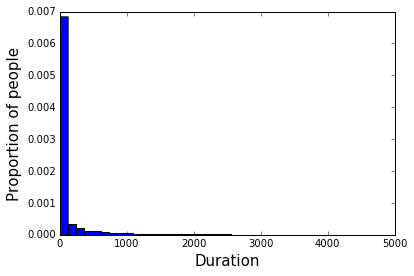

In [41]:
ax = plt.subplot(1,1,1)
#bins = np.logspace(0,4,num=40)
ax.hist(y, bins = 40, normed=True)
plt.xlabel('Duration', size=15)
plt.ylabel('Proportion of people', size=15)
#ax.set_yscale('log')
#ax.set_xscale('log')

In [42]:
print y.count(0)
print len(y)-y.count(0)
duration1 = {}
for key in duration:
    if duration[key] != 0:
        duration1[key] = duration[key]
print len(duration1)         

5312
3153
3153


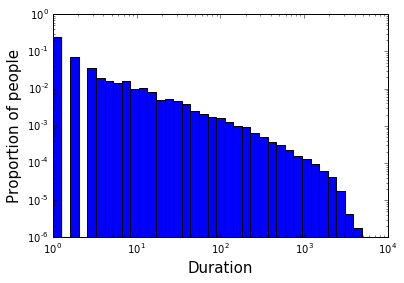

In [43]:
y1 = []
for i in duration1.values():
    y1.append(i)
ax = plt.subplot(1,1,1)
bins = np.logspace(0,4,num=40)
ax.hist(y1, bins = bins, normed=True)
plt.xlabel('Duration', size=15)
plt.ylabel('Proportion of people', size=15)
ax.set_xscale('log')
ax.set_yscale('log')

In [ ]:
#0 day, 1 month, 3 months, one year, over 10 years


In [44]:
duration2 = {}
for key in duration:
    if duration[key] == 0:
        duration2[key] = '0'
    elif duration[key] > 0 and duration[key] <= 30:
        duration2[key] = 'no more than 1 month'
    elif duration[key] > 30 and duration[key] <= 90:
        duration2[key] = '1 to 3 months'
    elif duration[key] > 90 and duration[key] <= 365:
        duration2[key] = '3 months to 1 year'
    elif duration[key] > 365 and duration[key] <= 1095:
        duration2[key] = '1 to 3 years'   
    elif duration[key] > 1095 and duration[key] <= 3650:
        duration2[key] = '3 to 10 years'
    else:
        duration2[key] = 'over 10 years'
duration2
y2 = []
for i in duration2.values():
    y2.append(i)
Counter(y2)

Counter({'0': 5312,
         '1 to 3 months': 475,
         '1 to 3 years': 508,
         '3 months to 1 year': 734,
         '3 to 10 years': 321,
         'no more than 1 month': 1105,
         'over 10 years': 10})

8465


'""\nplt.hist(duration3)\n'

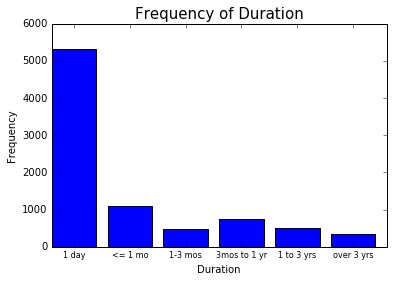

In [45]:
duration3 = []
dura = ''
for i in y2:
    if i == '0':
        dura = 0
    elif i == 'no more than 1 month':
        dura = 1
    elif i == '1 to 3 months':
        dura = 2
    elif i == '3 months to 1 year':
        dura = 3
    elif i == '1 to 3 years':
        dura = 4
    else:
        dura = 5
    duration3.append(dura)
print len(duration3) 

his = np.histogram(duration3,bins=range(7))
fig, ax = plt.subplots()
offset = .4
plt.bar(his[1][1:],his[0])
ax.set_xticks( his[1][1:] + offset)
ax.set_xticklabels(('1 day', '<= 1 mo', '1-3 mos', '3mos to 1 yr', '1 to 3 yrs', 'over 3 yrs'), size=8)
plt.title("Frequency of Duration", size=15)
plt.xlabel("Duration")
plt.ylabel("Frequency")

"""""
plt.hist(duration3)
"""""

# Comparison with random networks

In [145]:
len(node_size) #the first two graphs in graphs_list are empty

65

In [146]:
rnd_graphs = []
for n, e in zip(node_size, edge_size):
    random = nx.erdos_renyi_graph(n=n, p=float(2*e)/(n*(n-1)))
    rnd_graphs.append(random)
print len(rnd_graphs)

65


In [147]:
for g in rnd_graphs:
    print nx.info(g)

Name: gnp_random_graph(35,0.0974789915966)
Type: Graph
Number of nodes: 35
Number of edges: 55
Average degree:   3.1429
Name: gnp_random_graph(77,0.0741626794258)
Type: Graph
Number of nodes: 77
Number of edges: 214
Average degree:   5.5584
Name: gnp_random_graph(123,0.0705051312808)
Type: Graph
Number of nodes: 123
Number of edges: 526
Average degree:   8.5528
Name: gnp_random_graph(146,0.067548417572)
Type: Graph
Number of nodes: 146
Number of edges: 702
Average degree:   9.6164
Name: gnp_random_graph(149,0.0526936332305)
Type: Graph
Number of nodes: 149
Number of edges: 602
Average degree:   8.0805
Name: gnp_random_graph(88,0.0736677115987)
Type: Graph
Number of nodes: 88
Number of edges: 289
Average degree:   6.5682
Name: gnp_random_graph(113,0.0674778761062)
Type: Graph
Number of nodes: 113
Number of edges: 436
Average degree:   7.7168
Name: gnp_random_graph(232,0.0412748171369)
Type: Graph
Number of nodes: 232
Number of edges: 1058
Average degree:   9.1207
Name: gnp_random_graph(

In [153]:
density_rnd = []
cc_rnd = []
for g in rnd_graphs:
    d = nx.density(g)
    c = nx.average_clustering(g)  #'Clustering algorithms are not defined ', 'for directed graphs.'
    density_rnd.append(d)
    cc_rnd.append(c)
print density_rnd
print density
print cc_rnd
print cc

[0.09243697478991597, 0.07313738892686261, 0.0701052912168466, 0.06632026452527161, 0.05459822238345728, 0.07549634273772204, 0.06890012642225031, 0.03948350500074638, 0.06935123042505593, 0.053043110735418425, 0.01746314184036604, 0.020476360970453345, 0.03782194725988329, 0.04221461598510779, 0.015868289475316683, 0.027793462576071272, 0.02890576281134221, 0.02702702702702703, 0.024233211124027543, 0.024992734670154025, 0.020150746039070914, 0.02697708795269771, 0.03257080610021786, 0.0407673860911271, 0.04890936187508468, 0.06542056074766354, 0.06101949025487256, 0.0521978021978022, 0.06001796945193172, 0.07542942494398805, 0.06758720930232558, 0.06204379562043796, 0.04018264840182648, 0.053075700134523666, 0.05605484502822906, 0.059346888747838646, 0.05468120603142584, 0.056369277602154315, 0.04112733627558426, 0.03731621888042954, 0.05802599227256761, 0.06458011113020565, 0.05485481096758962, 0.055068755996162455, 0.0595847853372937, 0.053595527279737806, 0.04462901123574126, 0.04